# 通用教程简介(Introduction To ggplot2)  
以前，我们看到了使用ggplot2软件包制作图表的简短教程。它很快涉及制作ggplot的各个方面。现在，这是一个完整而完整的教程。现在讨论如何构造和自定义几乎所有ggplot。它涉及的原则，步骤和微妙之处，使图像的情节有效和更具视觉吸引力。因此，出于实用目的，我希望本教程可以作为书签参考，对您日常的绘图工作很有用。
这是ggplot2的三部分通用教程的第1部分，ggplot2是R中的美观（非常流行）的图形框架。该教程主要针对具有R编程语言的一些基本知识并希望制作复杂且美观的图表的用户与R ggplot2。
+ ggplot2简介(Introduction to ggplot2)
+ 自定义外观(Customizing the Look and Feel)
+ 前50个ggplot2可视化效果(top 50 ggplot2 Visualizations)

ggplot2简介涵盖了有关构建简单ggplot以及修改组件和外观的基本知识；自定义外观是关于图像的自定义，如使用多图，自定义布局操作图例、注释；前50个ggplot2可视化效果应用在第1部分和第2部分中学到的知识来构造其他类型的ggplot，例如条形图，箱形图等。

# 4 ggplot2入门笔记4—前50个ggplot2可视化效果
有效美观的图表特点为：
1. 传达正确的信息而不会扭曲事实。
2. 简单但优雅。它不应该迫使您为获得它而想太多。
3. 美学支持信息而不是遮蔽信息。
4. 没有过多的信息。

本章节介绍了有关构建8种基本类型图像的方法，该章节主要内容有：
1. 相关性(Correlation)
2. 偏差(Deviation)
3. 排名(Ranking)
4. 分布(Distribution)
5. 组成(Composition)
6. 变化(Change)
7. 群组(Groups)

**参考文档**
> http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

## 1 相关性(Correlation)
相关性图有助于检查两个变量之间的相关程度。
本节主要内容有：
+ 散点图(Scatterplot)
+ 带边界的散点图(Scatterplot With Encircling)
+ 抖动图(Jitter Plot)
+ 计数图(Counts Chart)
+ 气泡图(Bubble Plot)
+ 边际直方图/箱线图(Marginal Histogram / Boxplot)
+ 相关图(Correlogram)

### 1.1 散点图(Scatterplot)
数据分析中最常用的图无疑是散点图。每当您想了解两个变量之间关系的性质时，首选始终是散点图。  
它可以使用geom_point（）绘制。此外，geom_smooth默认情况下会绘制一条平滑线（基于损失），可以通过设置method='lm'来调整以绘制最佳拟合线。

In [1]:
# install.packages("ggplot2")
# load package and data

# turn-off scientific notation like 1e+48 关闭科学计数法
options(scipen=999)  
library(ggplot2)
# pre-set the bw theme. 设置主题
theme_set(theme_bw())  
# 调用数据集
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source
head(midwest)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"


PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,...,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,...,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,...,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,...,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,...,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,...,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


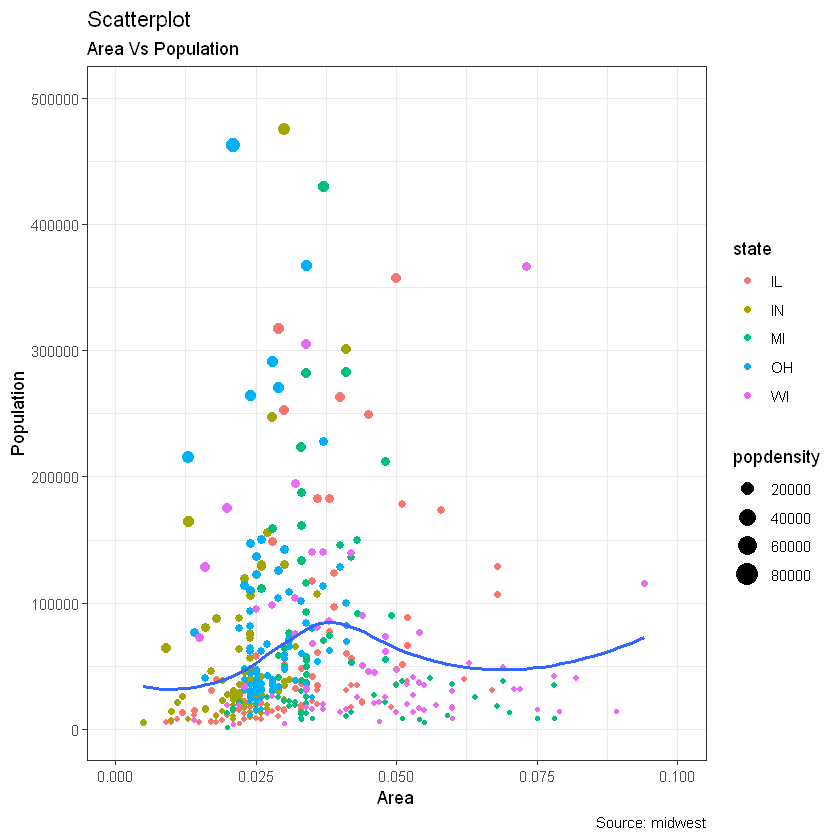

In [2]:
# Scatterplot
# 画散点图
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  # 画平滑曲线
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

### 1.2 带边界的散点图(Scatterplot With Encircling)
在介绍结果时，有时我会在图表中加上某些特殊的点或区域组，以便引起人们对那些特殊情况的注意。使用ggalt包中的geom_encircle()可以方便地完成此操作。在geom_encircle（）中，将数据设置为仅包含点（行）或兴趣点的新数据帧。此外，还可以展开曲线，以便仅在点之外通过。曲线的颜色和大小（厚度）也可以修改。请参见下面的示例。

In [3]:
# install 'ggalt' pkg
# devtools::install_github("hrbrmstr/ggalt")
options(scipen = 999)
library(ggplot2)
library(ggalt)

# 筛选符合要求的点
midwest_select <- midwest[midwest$poptotal > 350000 & 
                            midwest$poptotal <= 500000 & 
                            midwest$area > 0.01 & 
                            midwest$area < 0.1, ]

head(midwest_select)

Warning message:
"package 'ggalt' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
659,WILL,IL,0.050,357313,7146.260,303420,38361,692,4774,...,24.75686,5.887232,348384,97.50107,6.03472,7.463085,4.799198,8.563398,1,HLU
707,LAKE,IN,0.030,475594,15853.133,334203,116688,865,2772,...,17.66861,4.939173,469774,98.77627,13.80515,21.511037,11.093432,9.955780,1,AAU
1221,GENESEE,MI,0.037,430459,11634.027,336651,84257,3132,2902,...,20.14542,4.802019,425331,98.80871,16.46318,25.235707,13.843950,9.706895,1,AAU
2056,LUCAS,OH,0.021,462361,22017.191,380155,68456,1164,4981,...,23.55043,6.005897,454351,98.26759,15.26881,21.491653,13.494457,11.422802,1,AAU
2084,STARK,OH,0.034,367585,10811.324,339421,25052,950,1529,...,18.98960,4.620303,359231,97.72733,11.06057,16.399197,9.510669,8.458447,1,AAU
2993,DANE,WI,0.073,367085,5028.562,344617,10511,1201,8666,...,43.62645,13.471521,351558,95.77019,10.49301,8.767781,12.168011,4.974351,1,HAU


Warning message:
"Removed 15 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 15 rows containing missing values (geom_point)."


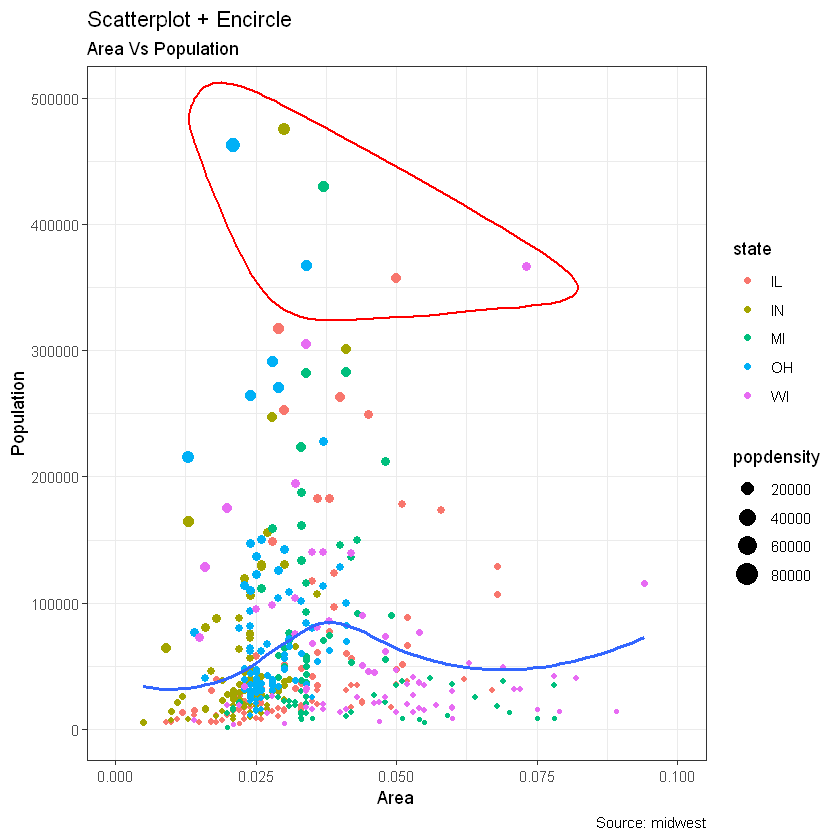

In [4]:
# Plot
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) +   # draw points
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  # draw smoothing line
  ylim(c(0, 500000)) +  
  # encircle 画边界
  geom_encircle(aes(x=area, y=poptotal), 
                data=midwest_select, 
                color="red", 
                size=2, 
                expand=0.08) +   #
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot + Encircle", 
       caption="Source: midwest")

### 1.3 抖动图(Jitter Plot)
让我们看一个新的数据来绘制散点图。这一次，我将使用mpg数据集来绘制城市里程（cty）与公路里程（hwy）。

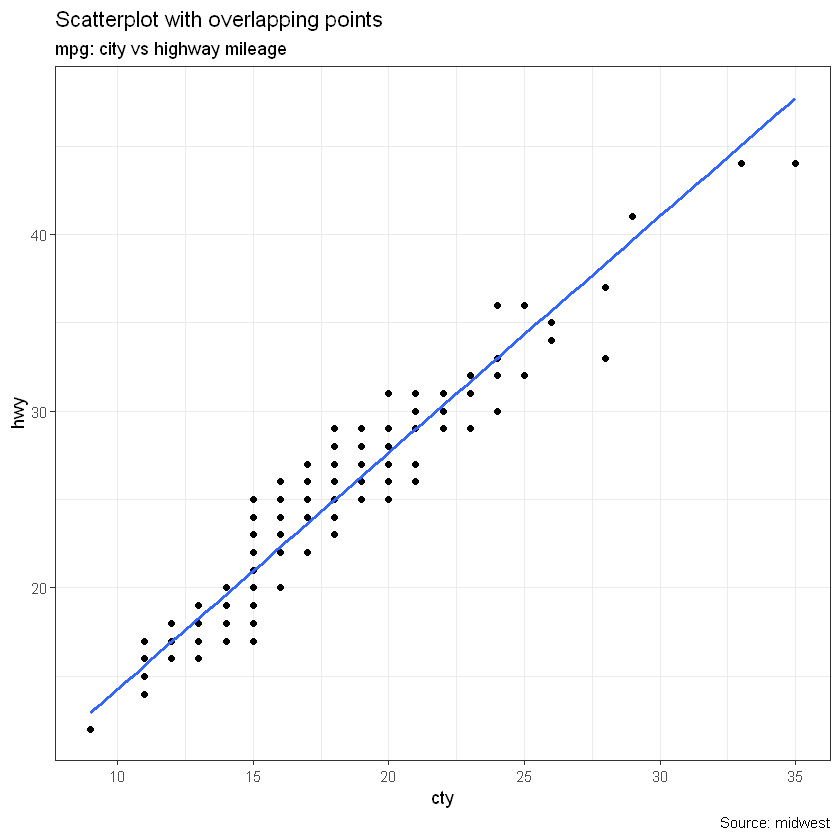

In [5]:
# load package and data
library(ggplot2)
data(mpg, package="ggplot2") 
# pre-set the bw theme. 提前设置主题
theme_set(theme_bw())  

g <- ggplot(mpg, aes(cty, hwy))

# Scatterplot
g + geom_point() + 
  geom_smooth(method="lm", se=F) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Scatterplot with overlapping points", 
       caption="Source: midwest")

我们这里有一个城市和公路里程的散点图在mpg数据集。我们看到了一个类似的散点图，这个图看起来很整洁，清楚地说明了城市里程（cty）和公路里程（hwy）之间的关系。但是，这个图像隐藏了一些东西。你能查出来吗？

In [6]:
dim(mpg)

[1] 234  11

原始数据有234个数据点，但图表显示的数据点似乎较少。发生了什么事？这是因为有许多重叠点显示为一个点。cty和hwy都是源数据集中的整数，这使得隐藏此细节更加方便。所以下次用整数绘制散点图时要格外小心。那怎么处理呢？几乎没有选择。我们可以用jitter_geom（）绘制抖动图。顾名思义，重叠点是基于由width参数控制的阈值围绕其原始位置随机抖动的。宽度越大，点从其原始位置抖动的位置就越多。

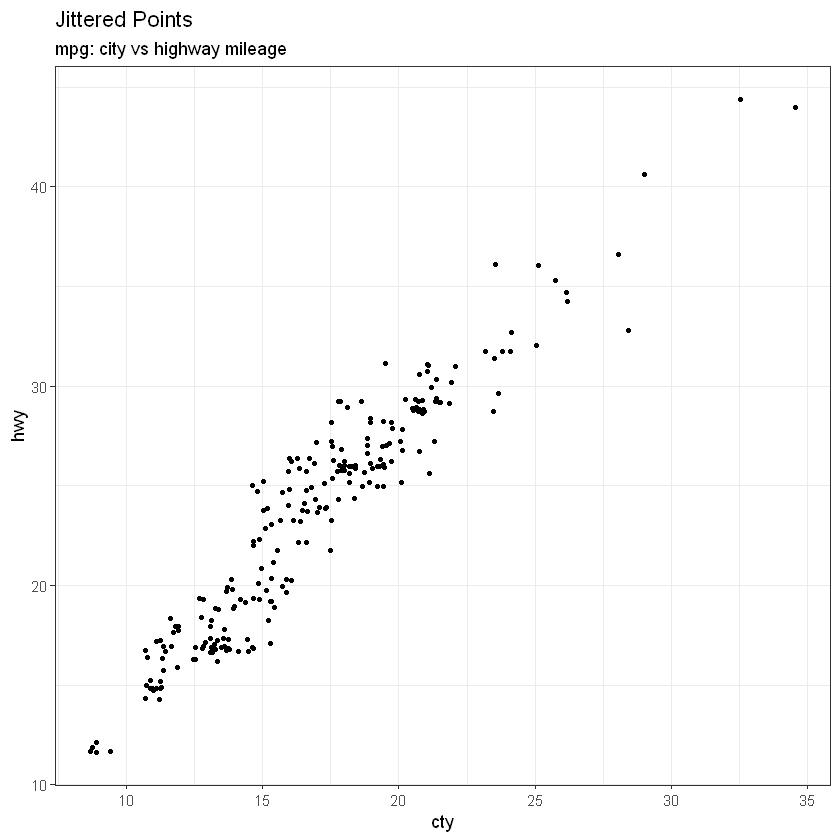

In [7]:
# load package and data
library(ggplot2)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

# Scatterplot
# pre-set the bw theme.
theme_set(theme_bw())  
g <- ggplot(mpg, aes(cty, hwy))
# 画抖动图
g + geom_jitter(width = 0.5, size=1) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Jittered Points")

### 1.4 计数图(Counts Chart)
克服数据点重叠问题的第二种方法是使用所谓的计数图。如果重叠的点越多，圆的大小就越大。

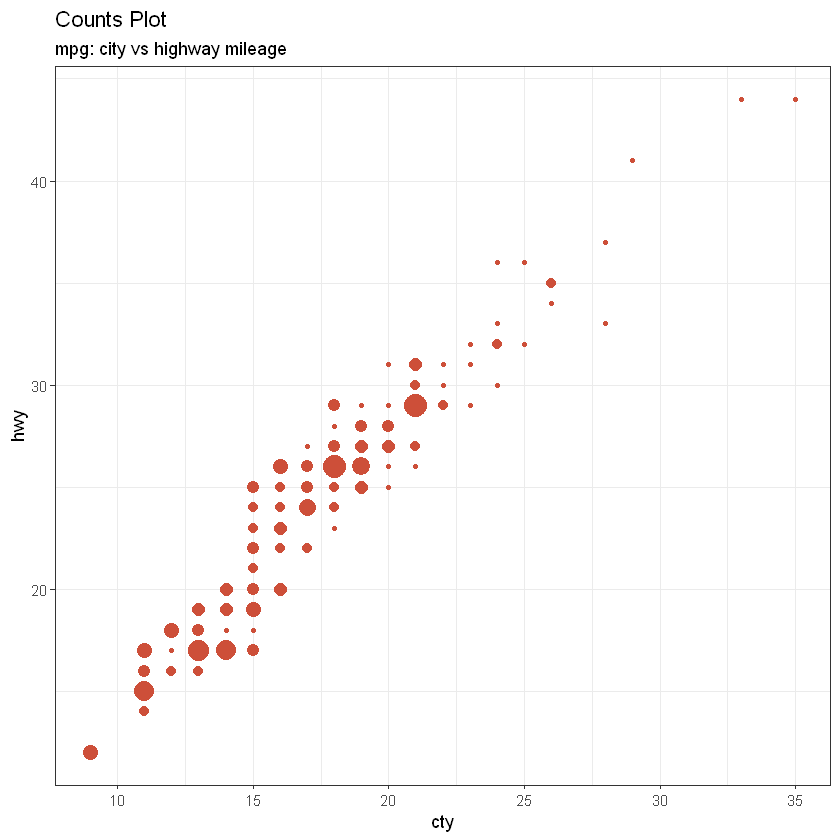

In [8]:
# load package and data
library(ggplot2)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

# Scatterplot
# pre-set the bw theme.
theme_set(theme_bw())  
g <- ggplot(mpg, aes(cty, hwy))
# 画计数图，show.legent设置图例
g + geom_count(col="tomato3", show.legend=F) +
  labs(subtitle="mpg: city vs highway mileage", 
       y="hwy", 
       x="cty", 
       title="Counts Plot")


### 1.5 气泡图(Bubble Plot)  
尽管散点图可让您比较2个连续变量之间的关系，但如果您想基于以下内容理解基础组内的关系，则气泡图非常有用。
1. 分类变量（通过更改颜色）
2. 另一个连续变量（通过更改点的大小）


用简单的话来说，如果您有4维数据，其中两个是数字（X和Y），另一个是分类（颜色），另一个是数字变量（大小），则气泡图更适合。  
下图气泡图清楚地区分了制造商之间的显示范围以及最佳拟合线的斜率如何变化，从而提供了组之间更好的视觉比较。

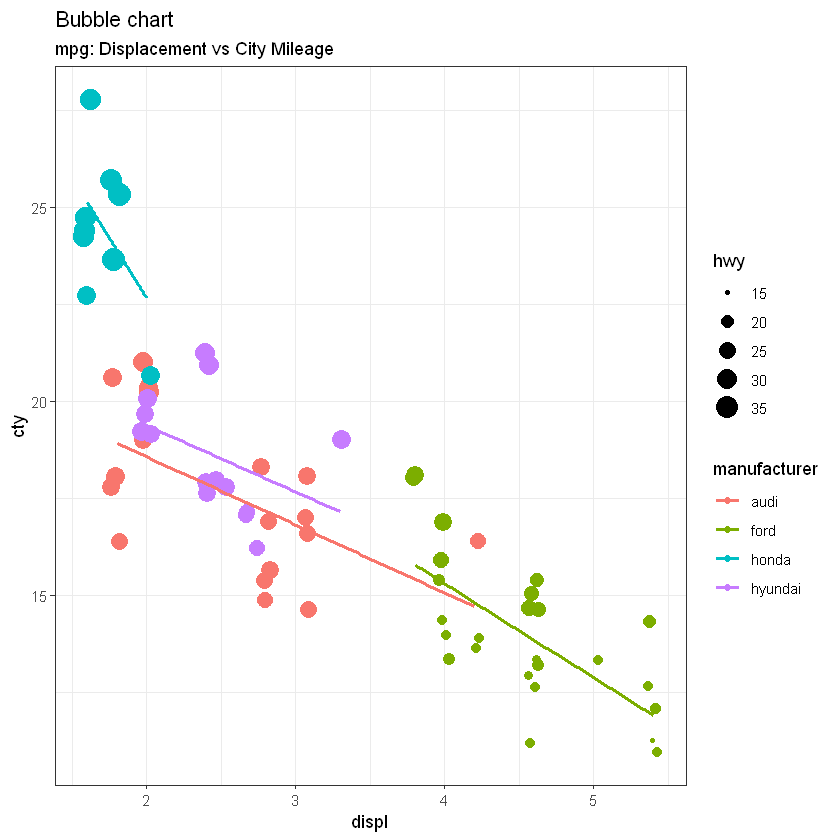

In [9]:
# load package and data
library(ggplot2)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"), ]

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
g <- ggplot(mpg_select, aes(displ, cty)) + 
  labs(subtitle="mpg: Displacement vs City Mileage",
       title="Bubble chart")

g + geom_jitter(aes(col=manufacturer, size=hwy)) + 
  # 画平滑曲线
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

### 1.6 边际直方图/箱线图(Marginal Histogram / Boxplot)
如果要在同一图表中显示关系和分布，请使用边际直方图。它在散点图的边缘处具有X和Y变量的直方图。
可以使用ggMarginal()' ggExtra'包中的函数来实现。除了histogram之外，您还可以通过设置相应的选项type来选择绘制箱形图boxplot或density绘图。

Warning message:
"package 'ggExtra' was built under R version 3.6.3"


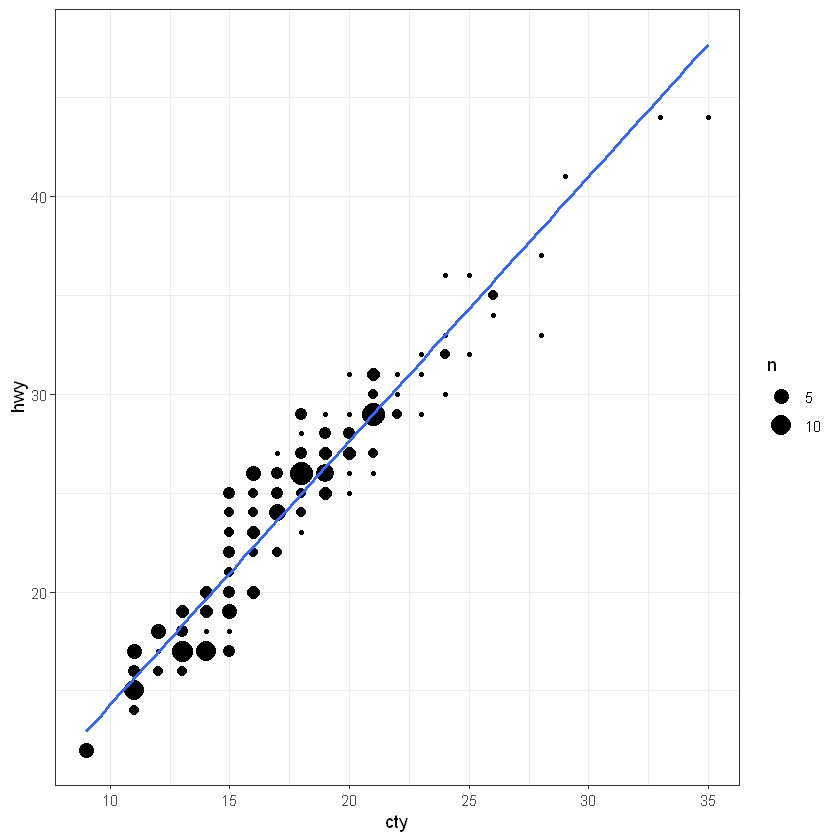

In [10]:
# load package and data
library(ggplot2)
library(ggExtra)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
mpg_select <- mpg[mpg$hwy >= 35 & mpg$cty > 27, ]
g <- ggplot(mpg, aes(cty, hwy)) + 
  # 绘制计数图
  geom_count() + 
  # se是否绘制置信区间
  geom_smooth(method="lm", se=FALSE)

plot(g)

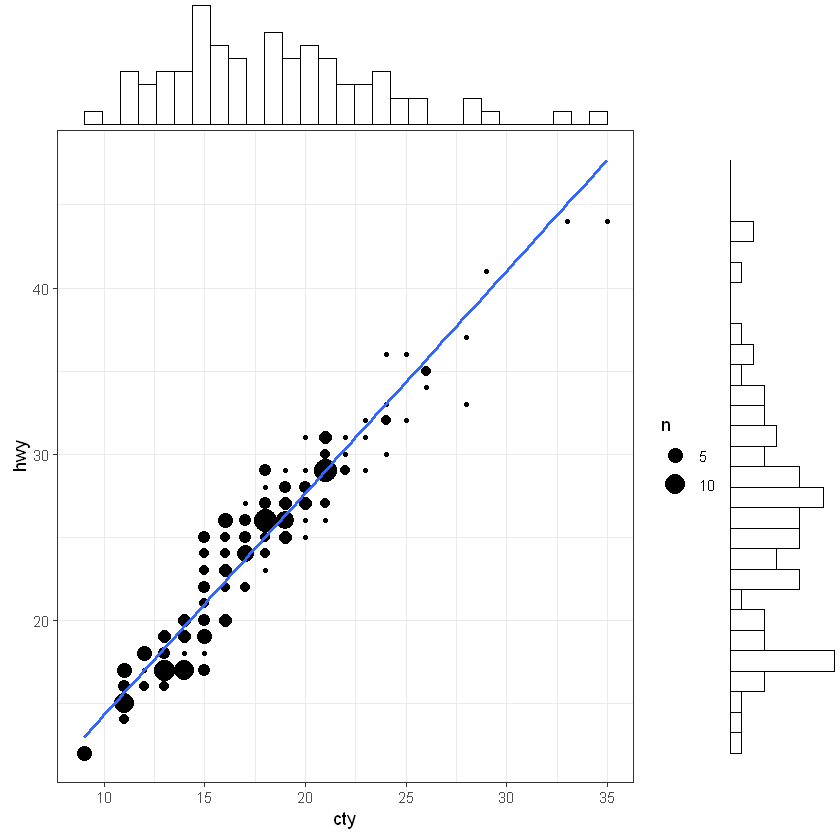

In [11]:
# 绘制边际直方图
ggMarginal(g, type = "histogram", fill="transparent")

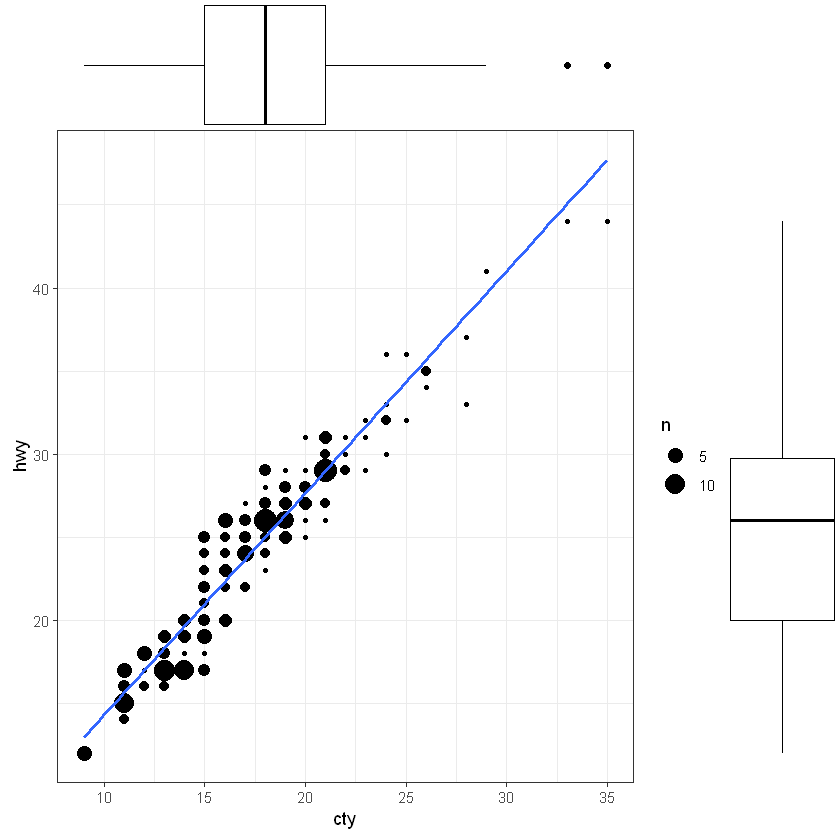

In [12]:
# 绘制边际箱形图
ggMarginal(g, type = "boxplot", fill="transparent")

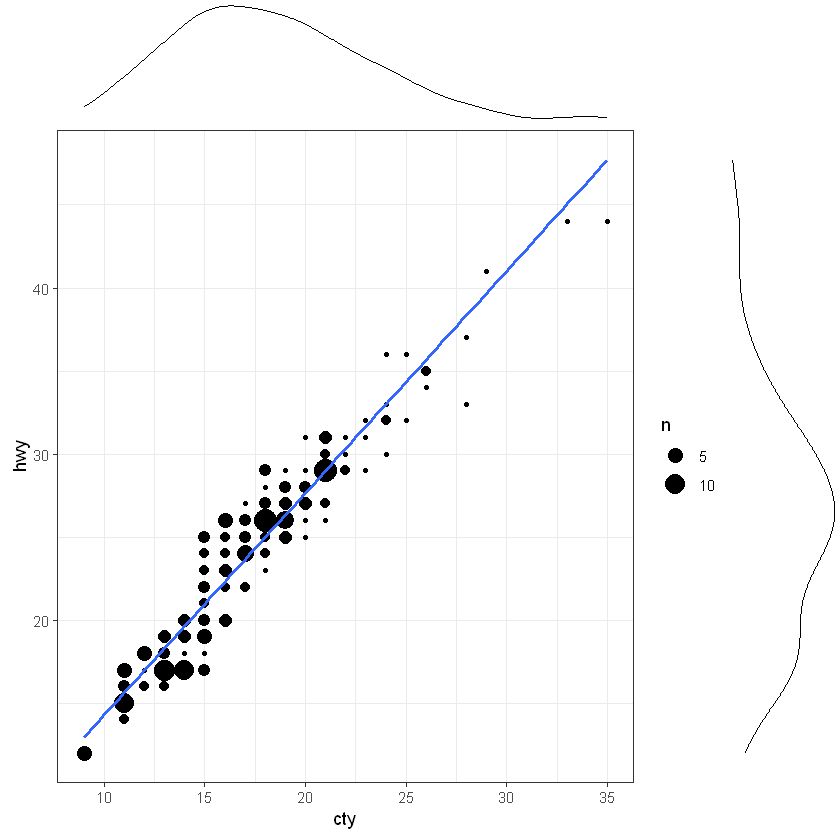

In [13]:
# 绘制边际核密度图
ggMarginal(g, type = "density", fill="transparent")

### 1.7 相关图(Correlogram)
相关图让您检查同一数据帧中存在的多个连续变量的相关性。使用ggcorrplot包可以方便地实现。



In [14]:
# devtools::install_github("kassambara/ggcorrplot")
library(ggplot2)
library(ggcorrplot)

# Correlation matrix
data(mtcars)
# 计算相关性结果
corr <- round(cor(mtcars), 1)
corr

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


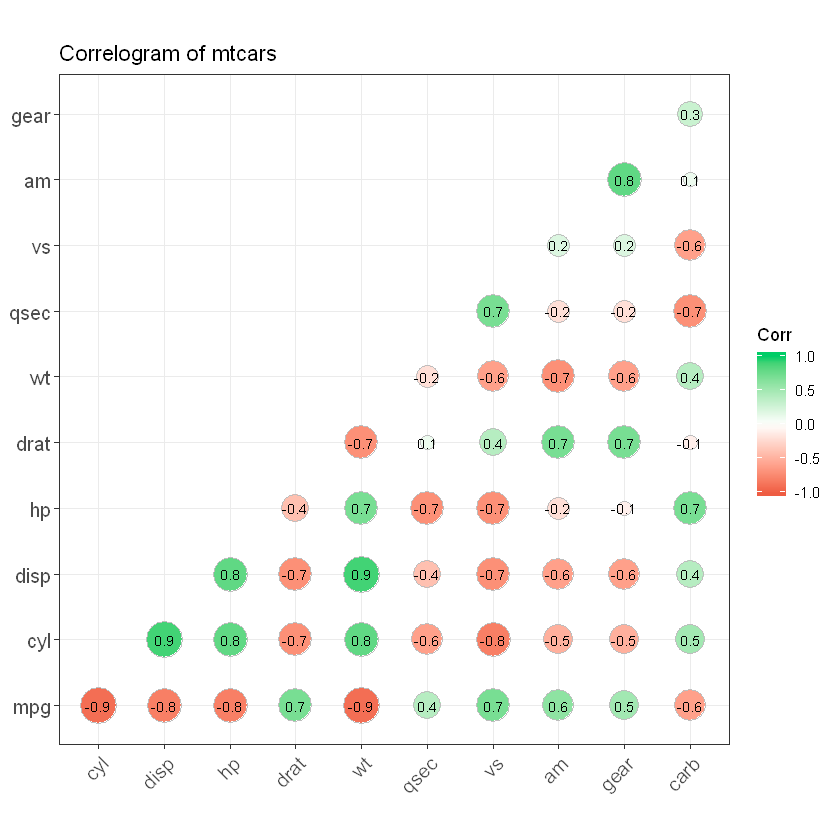

In [15]:
# Plot
# 画相关系图
ggcorrplot(corr,
           # hc.order是否对相关性矩阵排序
           hc.order = FALSE, 
           # 下三角形显示
           type = "lower",
           # 是否显示图中数字
           lab = TRUE, 
           # 图中点的大小
           lab_size = 3, 
           # 点的形状square or circle
           method="circle", 
           # 颜色
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of mtcars", 
           ggtheme=theme_bw)

## 2 偏差(Deviation)
比较少量项目（或类别）与固定引用值之间的变化用偏差图最好。本节主要内容有：
+ 发散条形图(Diverging bars)
+ 发散棒棒糖图(Diverging Lollipop Chart)
+ 发散点图(Diverging Dot Plot)
+ 面积图(Area Chart)


### 2.1 发散条形图(Diverging bars)  
发散条形图是可以处理负值和正值的条形图。这可以通过使用进行智能调整来实现geom_bar()。但是使用的用法geom_bar()可能会很混乱。那是因为，它可以用来制作条形图和直方图。让我解释。  
默认情况下，geom_bar()将stat设置为count。这意味着，当您仅提供连续的X变量（而不提供Y变量）时，它将尝试从数据中生成直方图。为了使条形图创建条形而不是直方图，您需要做两件事。
1. 设置stat=identity
2. 同时提供x和y

为了确保您获得的条形不只是条形，请确保分类变量具有2个类别，这些类别会在连续变量的某个阈值处更改值。在下面的示例中，mpg通过计算z得分对来自mtcars数据集进行归一化。mpg高于零的车辆标记为绿色，低于mpg的车辆标记为红色。

In [16]:
library(ggplot2)
theme_set(theme_bw())  

# Data Prep
# load data 加载数据
data("mtcars")  
mtcars$`car name` <- rownames(mtcars)  # create new column for car names
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)  # compute normalized mpg
# # above / below avg flag
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above")  
mtcars <- mtcars[order(mtcars$mpg_z), ]  # sort
mtcars$`car name` <- factor(mtcars$`car name`, levels = mtcars$`car name`)  # convert to factor to retain sorted order in plot.

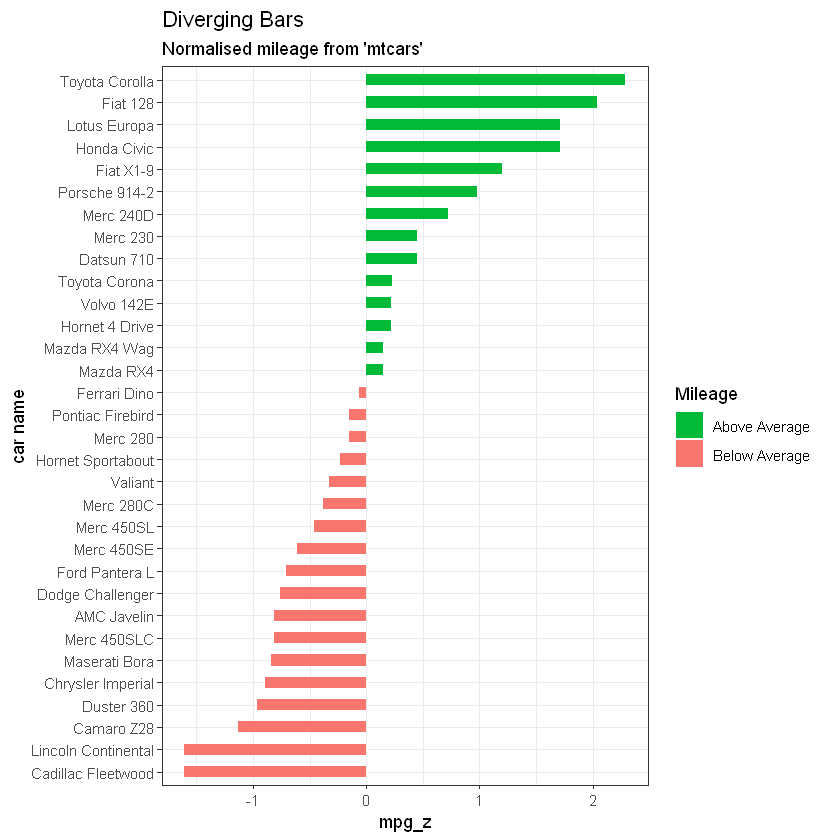

In [17]:

# Diverging Barcharts
ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) + 
  #条形图
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  # 自定义颜色
  scale_fill_manual(name="Mileage", 
                    labels = c("Above Average", "Below Average"), 
                    values = c("above"="#00ba38", "below"="#f8766d")) + 
  labs(subtitle="Normalised mileage from 'mtcars'", 
       title= "Diverging Bars") + 
  # 翻转坐标轴
  coord_flip()

### 2.2 发散棒棒糖图(Diverging Lollipop Chart)
棒棒糖图表传达的信息与条形图和分散条形图相同。除了看起来更现代。我使用geom_point和geom_segment来代替棒棒糖，而不是geom_bar 。让我们使用在上一个分支示例中准备的相同数据绘制一个棒棒糖图。

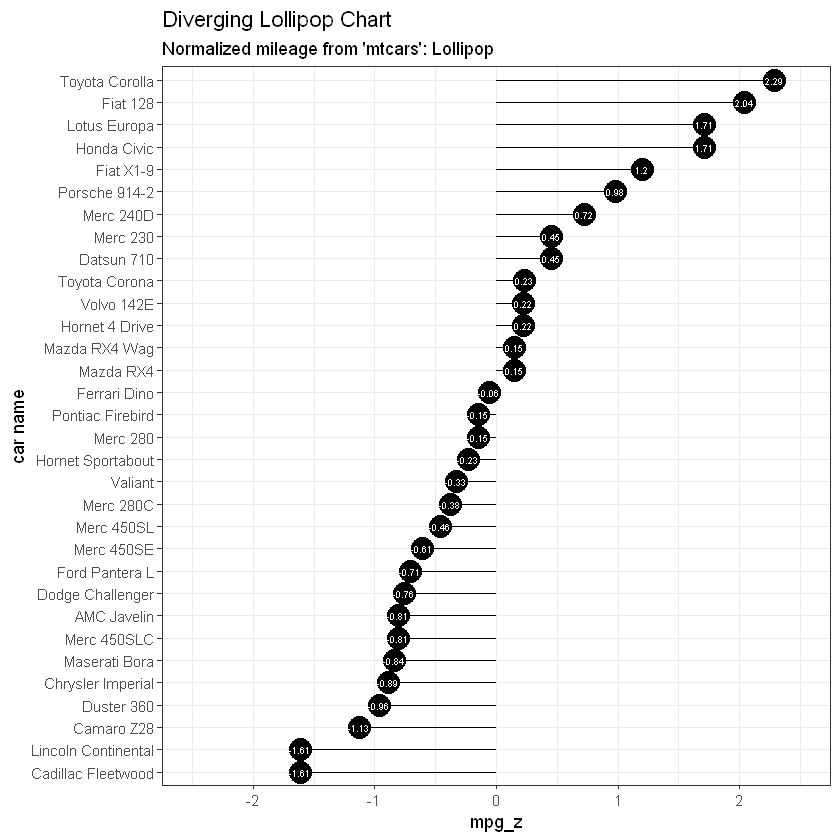

In [18]:
library(ggplot2)
theme_set(theme_bw())

ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) + 
  geom_point(stat='identity', fill="black", size=6)  +
  # 绘制点x,y到xend,yend的直线
  geom_segment(aes(y = 0, 
                   x = `car name`, 
                   yend = mpg_z, 
                   xend = `car name`), 
               color = "black") +
  geom_text(color="white", size=2) +
  labs(title="Diverging Lollipop Chart", 
       subtitle="Normalized mileage from 'mtcars': Lollipop") + 
  ylim(-2.5, 2.5) +
  coord_flip()

### 2.3 发散点图(Diverging Dot Plot)
点图传达了类似的信息。除了仅使用点外，原理与在发散条形图中看到的图案相同。

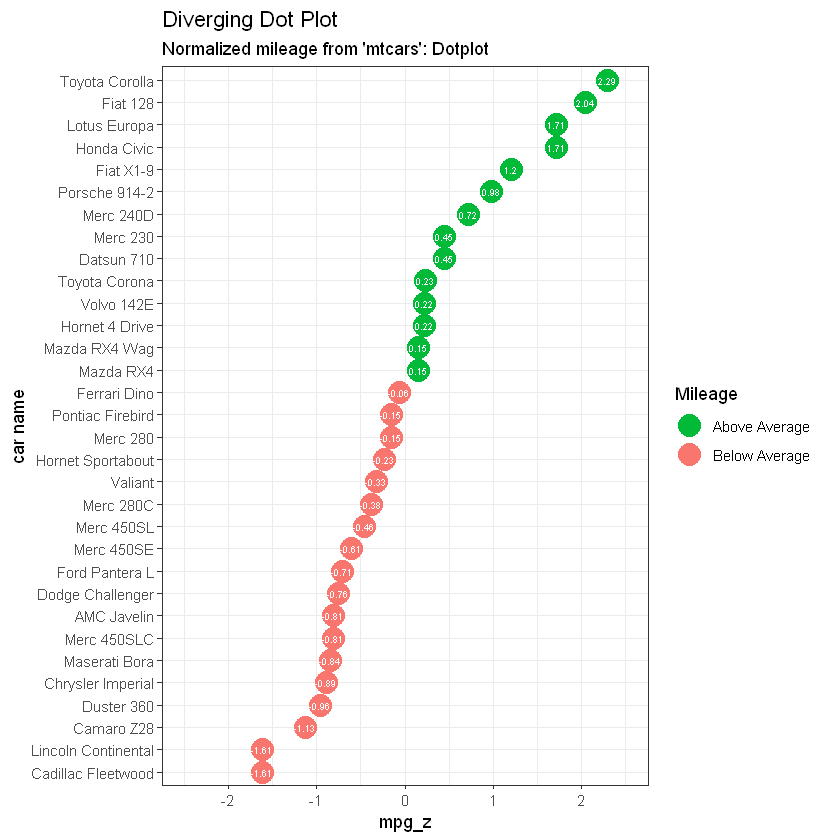

In [19]:
library(ggplot2)
theme_set(theme_bw())

# Plot
ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) + 
  geom_point(stat='identity', aes(col=mpg_type), size=6)  +
  scale_color_manual(name="Mileage", 
                     labels = c("Above Average", "Below Average"), 
                     values = c("above"="#00ba38", "below"="#f8766d")) + 
  geom_text(color="white", size=2) +
  labs(title="Diverging Dot Plot", 
       subtitle="Normalized mileage from 'mtcars': Dotplot") + 
  ylim(-2.5, 2.5) +
  coord_flip()

### 2.4 面积图(Area Chart)  
面积图通常用于可视化特定指标（如股票回报率百分比）与特定基线的比较。其他类型的%returns或%change数据也常用。geom_area（）实现了这一点。

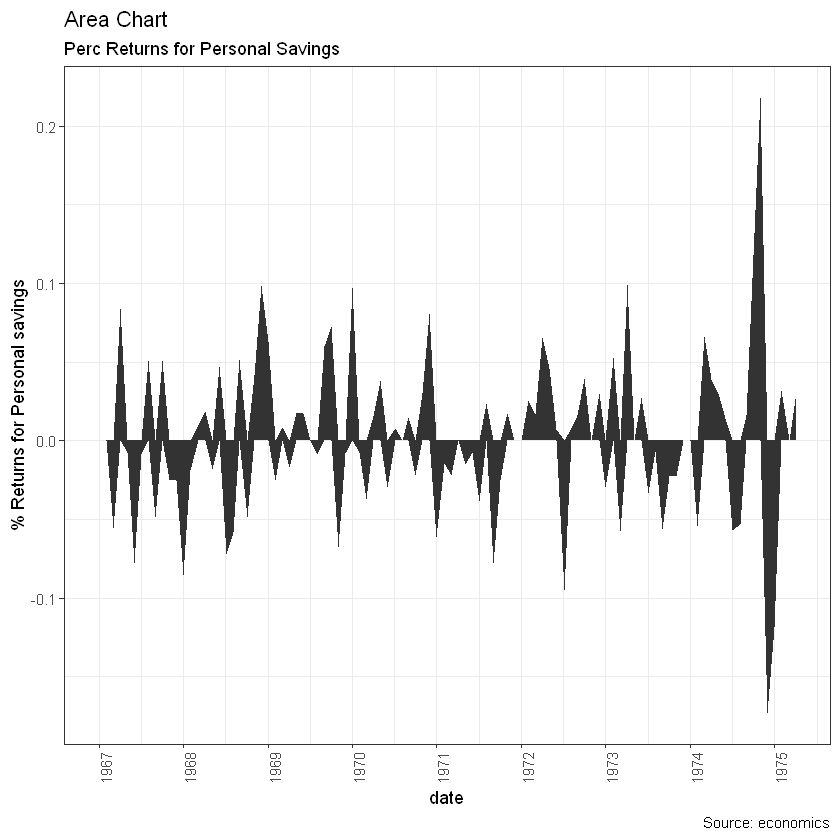

In [21]:
library(ggplot2)
library(quantmod)
data("economics", package = "ggplot2")

# Compute % Returns
economics$returns_perc <- c(0, diff(economics$psavert)/economics$psavert[-length(economics$psavert)])

# Create break points and labels for axis ticks
brks <- economics$date[seq(1, length(economics$date), 12)]
lbls <- lubridate::year(economics$date[seq(1, length(economics$date), 12)])

# Plot
ggplot(economics[1:100, ], aes(date, returns_perc)) + 
 # 画面积图
  geom_area() + 
  scale_x_date(breaks=brks, labels=lbls) + 
  theme(axis.text.x = element_text(angle=90)) + 
  labs(title="Area Chart", 
       subtitle = "Perc Returns for Personal Savings", 
       y="% Returns for Personal savings", 
       caption="Source: economics")

## 3. 排名(Ranking)
排名用于比较多个项目彼此之间的位置或性能。但实际值比排名重要。本节主要内容有：
+ 有序条形图(Ordered Bar Chart)
+ 棒棒糖图(Lollipop Chart)
+ 点图(Dot Plot)
+ 坡度图(Slope Chart)
+ 哑铃图(Dumbbell Plot)

### 3.1 有序条形图
有序条形图是由Y轴变量排序的条形图。仅仅按感兴趣的变量对数据帧进行排序不足以对条形图进行排序。为了使条形图保持行的顺序，必须将X轴变量（即类别）转换为因子。让我们从mpg数据集中绘制每个制造商的平均城市里程。首先，汇总数据并对其进行排序，然后再绘制绘图。最后，将X变量转换为因子。让我们看看如何完成

In [22]:
# Prepare data: group mean city mileage by manufacturer.
cty_mpg <- aggregate(mpg$cty, by=list(mpg$manufacturer), FUN=mean)  # aggregate
colnames(cty_mpg) <- c("make", "mileage")  # change column names
cty_mpg <- cty_mpg[order(cty_mpg$mileage), ]  # sort
cty_mpg$make <- factor(cty_mpg$make, levels = cty_mpg$make)  # to retain the order in plot.
head(cty_mpg, 4)

,make,mileage
,<fct>,<dbl>
9,lincoln,11.33333
8,land rover,11.50000
3,dodge,13.13514
10,mercury,13.25000


X变量现在是一个因子，让我们绘图。



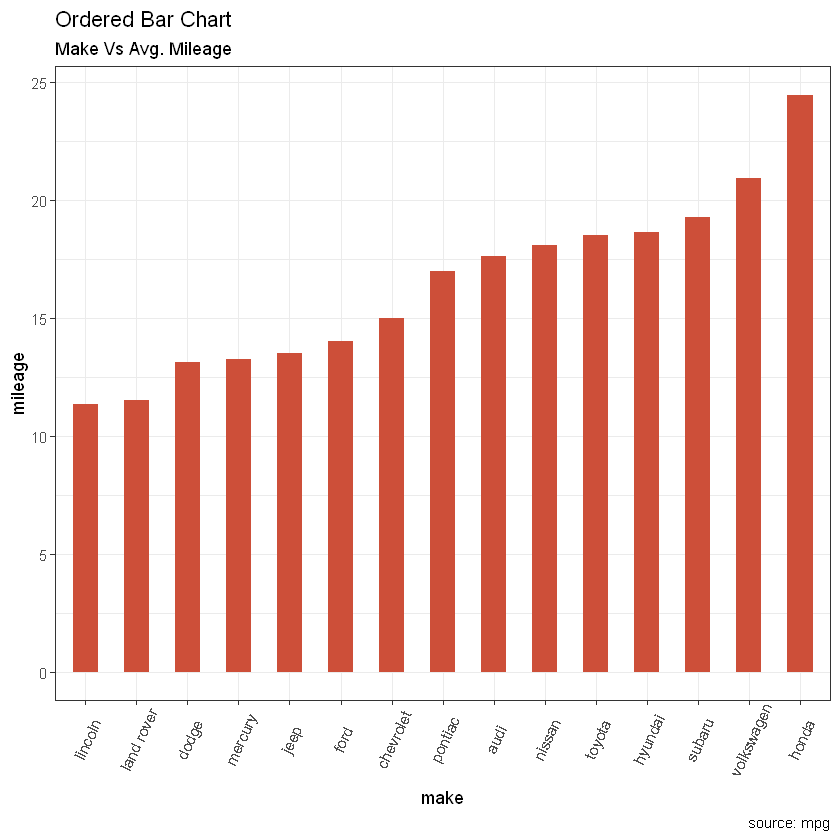

In [23]:
library(ggplot2)
theme_set(theme_bw())

# Draw plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Make Vs Avg. Mileage", 
       caption="source: mpg") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

### 3.2 棒棒糖图(Lollipop Chart)
棒棒糖图表传达的信息与条形图相同。通过将粗条减少为细线，可以减少混乱，并更加重视该值。看起来不错，很现代。

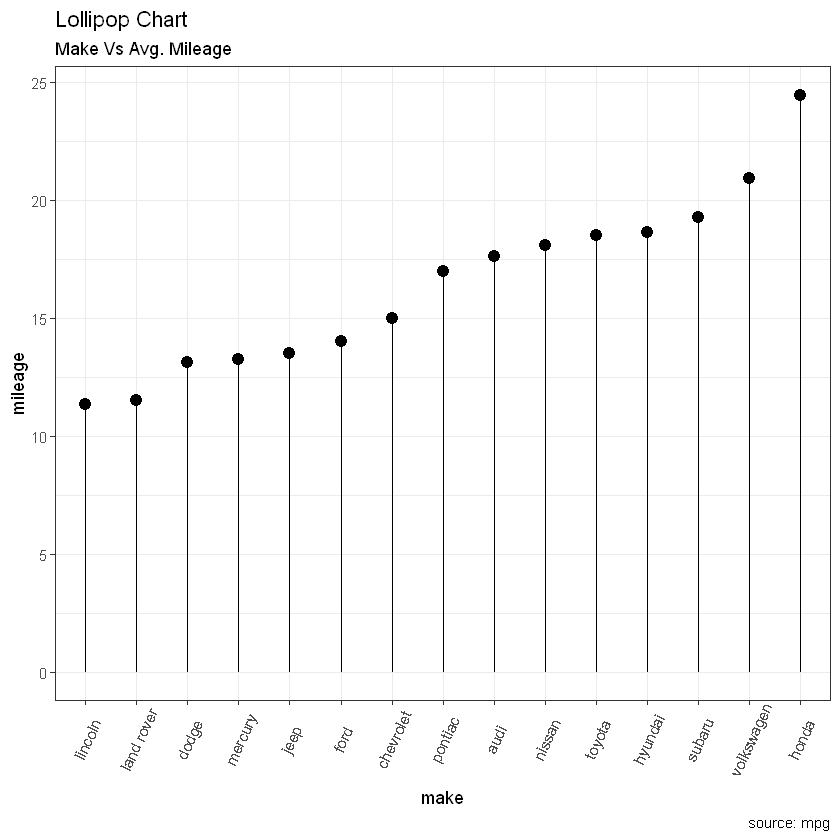

In [24]:
library(ggplot2)
theme_set(theme_bw())

# Plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_point(size=3) + 
  geom_segment(aes(x=make, 
                   xend=make, 
                   y=0, 
                   yend=mileage)) + 
  labs(title="Lollipop Chart", 
       subtitle="Make Vs Avg. Mileage", 
       caption="source: mpg") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

### 3.3 点图(Dot Plot)
点图与棒棒糖非常相似，但是没有线条，而是翻转到水平位置。它更加强调了项目相对于实际值的等级排序以及实体之间的距离。



Warning message:
"package 'scales' was built under R version 3.6.1"


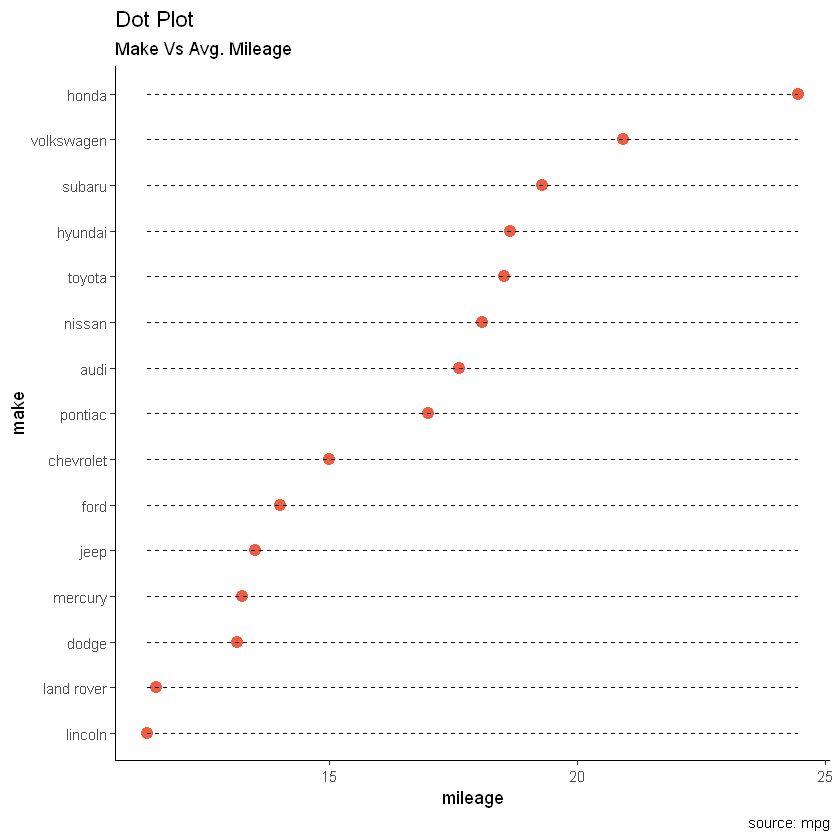

In [25]:
library(ggplot2)
library(scales)
theme_set(theme_classic())

# Plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_point(col="tomato2", size=3) +   # Draw points
  geom_segment(aes(x=make, 
                   xend=make, 
                   y=min(mileage), 
                   yend=max(mileage)), 
               linetype="dashed", 
               size=0.1) +   # Draw dashed lines
  labs(title="Dot Plot", 
       subtitle="Make Vs Avg. Mileage", 
       caption="source: mpg") +  
  coord_flip()

### 3.4 坡度图(Slope Chart)
坡度图是比较2个时间点之间的位置位置的绝佳方法。目前，没有内置函数可以构造此函数。以下代码可作为您如何实现此目标的指南。



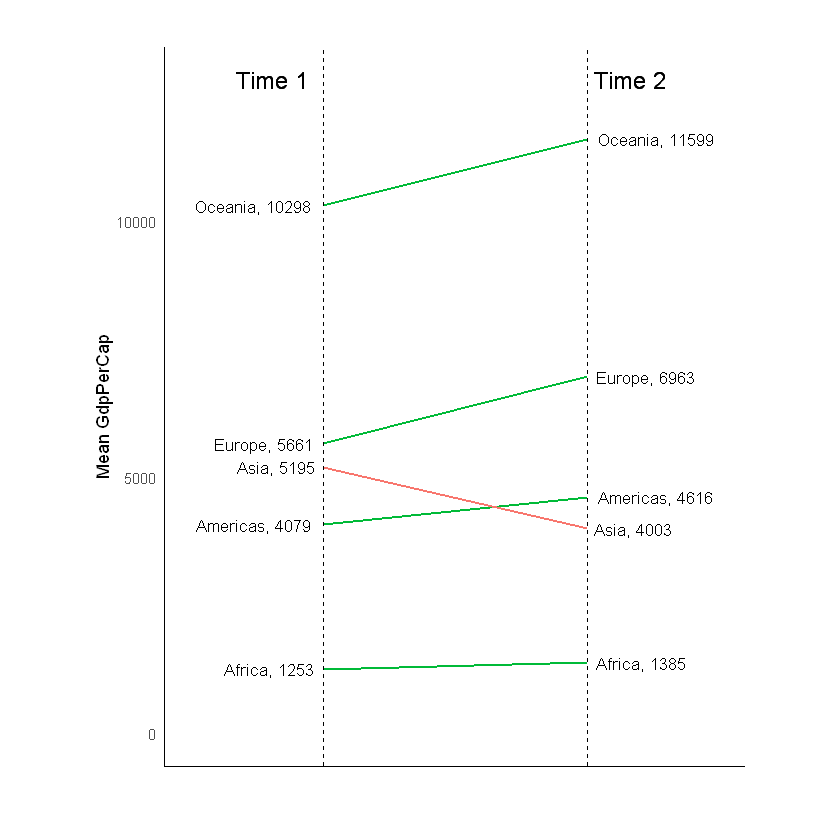

In [26]:
library(ggplot2)
library(scales)
theme_set(theme_classic())

# prep data
df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
colnames(df) <- c("continent", "1952", "1957")
left_label <- paste(df$continent, round(df$`1952`),sep=", ")
right_label <- paste(df$continent, round(df$`1957`),sep=", ")
df$class <- ifelse((df$`1957` - df$`1952`) < 0, "red", "green")

# Plot
p <- ggplot(df) + geom_segment(aes(x=1, xend=2, y=`1952`, yend=`1957`, col=class), size=.75, show.legend=F) + 
                  geom_vline(xintercept=1, linetype="dashed", size=.1) + 
                  geom_vline(xintercept=2, linetype="dashed", size=.1) +
                  scale_color_manual(labels = c("Up", "Down"), 
                                     values = c("green"="#00ba38", "red"="#f8766d")) +  # color of lines
                  labs(x="", y="Mean GdpPerCap") +  # Axis labels
                  xlim(.5, 2.5) + ylim(0,(1.1*(max(df$`1952`, df$`1957`))))  # X and Y axis limits

# Add texts
p <- p + geom_text(label=left_label, y=df$`1952`, x=rep(1, NROW(df)), hjust=1.1, size=3.5)
p <- p + geom_text(label=right_label, y=df$`1957`, x=rep(2, NROW(df)), hjust=-0.1, size=3.5)
p <- p + geom_text(label="Time 1", x=1, y=1.1*(max(df$`1952`, df$`1957`)), hjust=1.2, size=5)  # title
p <- p + geom_text(label="Time 2", x=2, y=1.1*(max(df$`1952`, df$`1957`)), hjust=-0.1, size=5)  # title

# Minify theme
p + theme(panel.background = element_blank(), 
           panel.grid = element_blank(),
           axis.ticks = element_blank(),
           axis.text.x = element_blank(),
           panel.border = element_blank(),
           plot.margin = unit(c(1,2,1,2), "cm"))

### 3.5 哑铃图(Dumbbell Plot)
哑铃图表是一个很好的工具，如果你想：1。想象两个时间点之间的相对位置（如增长和下降）。2。比较两个类别之间的距离。
为了得到哑铃的正确顺序，Y变量应该是一个因子，因子变量的级别应该与它在图中出现的顺序相同。

Warning message:
"Ignoring unknown parameters: point.colour.l"


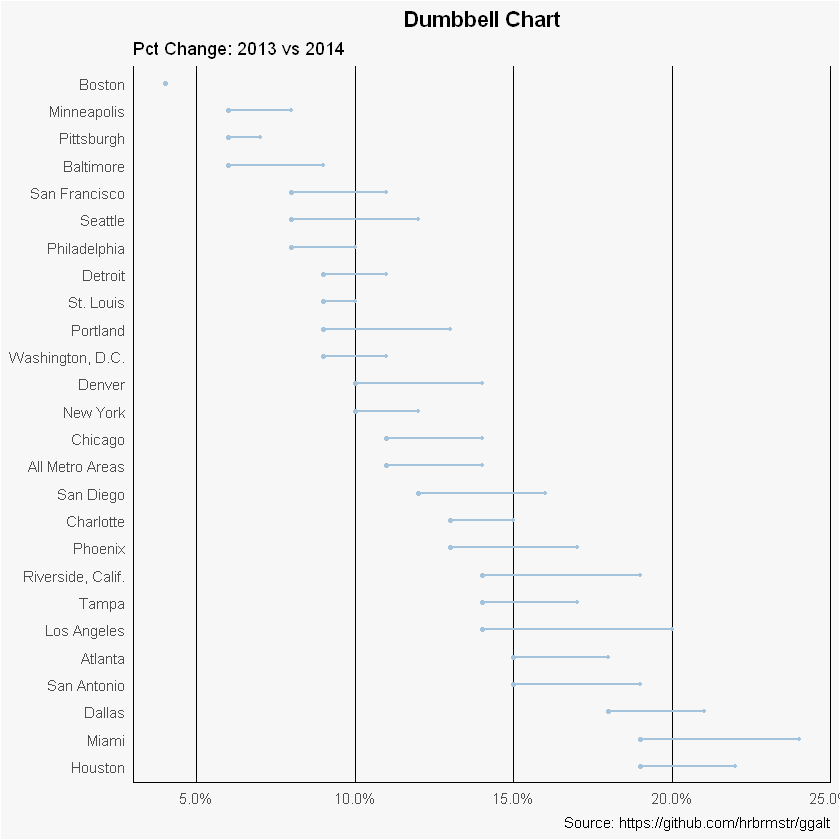

In [27]:
# devtools::install_github("hrbrmstr/ggalt")
library(ggplot2)
library(ggalt)
theme_set(theme_classic())

health <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
health$Area <- factor(health$Area, levels=as.character(health$Area))  # for right ordering of the dumbells

# health$Area <- factor(health$Area)
gg <- ggplot(health, aes(x=pct_2013, xend=pct_2014, y=Area, group=Area)) +
        # 画哑铃图
        geom_dumbbell(color="#a3c4dc", 
                      size=0.75, 
                      point.colour.l="#0e668b") + 
        scale_x_continuous(label=percent) + 
        labs(x=NULL, 
             y=NULL, 
             title="Dumbbell Chart", 
             subtitle="Pct Change: 2013 vs 2014", 
             caption="Source: https://github.com/hrbrmstr/ggalt") +
        theme(plot.title = element_text(hjust=0.5, face="bold"),
              plot.background=element_rect(fill="#f7f7f7"),
              panel.background=element_rect(fill="#f7f7f7"),
              panel.grid.minor=element_blank(),
              panel.grid.major.y=element_blank(),
              panel.grid.major.x=element_line(),
              axis.ticks=element_blank(),
              legend.position="top",
              panel.border=element_blank())
plot(gg)

## 4 分布(Distribution)
当您有很多数据点并且想要研究数据点的位置和分布方式时,推荐使用分布类型的图。本节主要内容有：
+ 直方图(Histogram)
+ 密度图(Density Plot)
+ 箱形图(Box Plot)
+ 点+箱形图(Dot + Box Plot)
+ 簇状箱形图(Tufte Boxplot)
+ 小提琴图(Violin Plot)
+ 人口金字塔(Population Pyramid)



### 4.1 直方图(Histogram)
默认情况下，如果只提供一个变量，geom_bar（）会尝试计算计数。为了使它像条形图一样工作，必须设置stat=identity选项，并且必须提供x和y值。

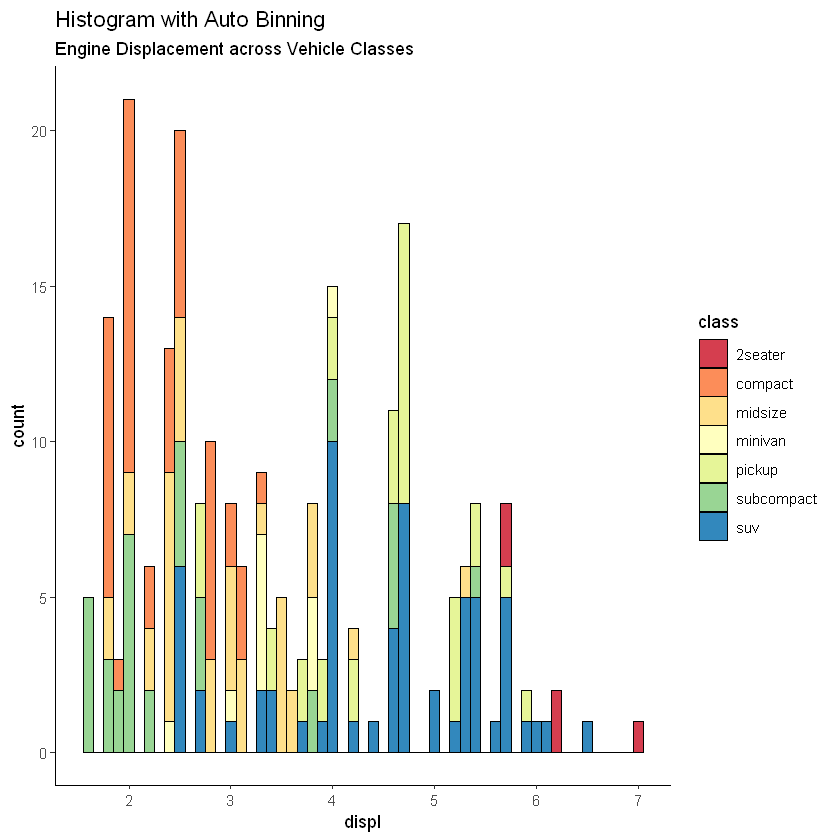

In [28]:
library(ggplot2)
theme_set(theme_classic())

# Histogram on a Continuous (Numeric) Variable
g <- ggplot(mpg, aes(displ)) + 
# 设置颜色
scale_fill_brewer(palette = "Spectral")

g + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning", 
       subtitle="Engine Displacement across Vehicle Classes") 

此外连续变量的直方图可以使用geom_bar（）或geom_Histogram（）来完成。使用geom_histogram（）时，可以使用bin选项控制条数。否则，可以使用binwidth设置每个bin所覆盖的范围。binwidth的值与构建直方图的连续变量的比例相同。由于geom_直方图提供了控制bin数量和bin宽度的功能，因此在连续变量上创建直方图是首选方法。

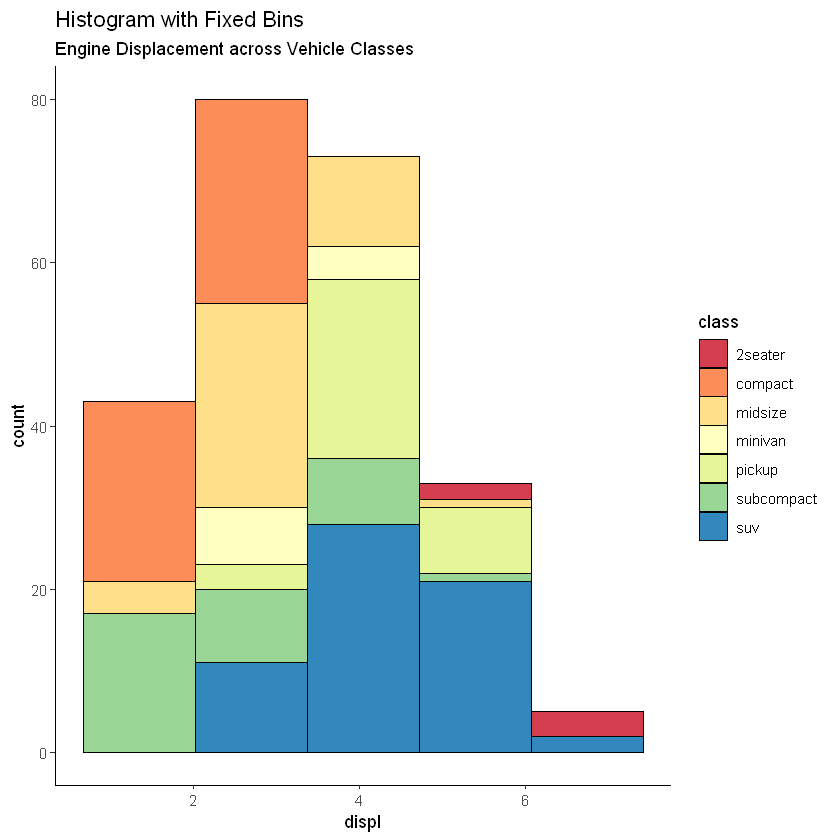

In [29]:
g + geom_histogram(aes(fill=class), 
                   bins=5, 
                   col="black", 
                   size=.1) +   # change number of bins
  labs(title="Histogram with Fixed Bins", 
       subtitle="Engine Displacement across Vehicle Classes") 

分类变量的直方图将产生一个频率图，显示每个类别的条形图。通过调整宽度，可以调整bar的厚度。

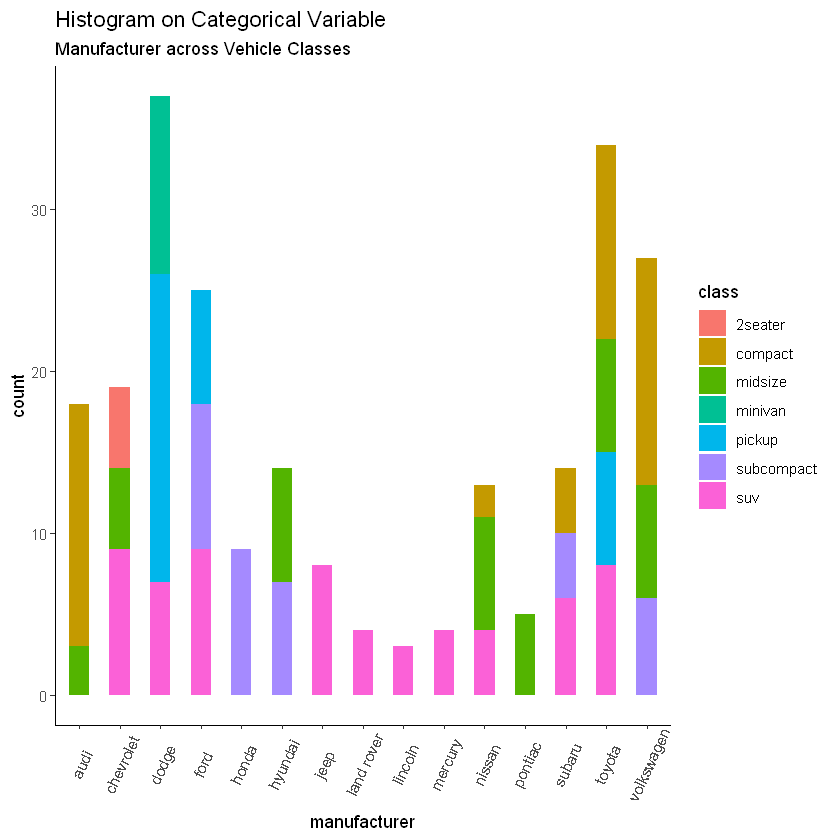

In [30]:
library(ggplot2)
theme_set(theme_classic())

# Histogram on a Categorical variable
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Histogram on Categorical Variable", 
       subtitle="Manufacturer across Vehicle Classes") 

### 4.3 密度图(Density plot)


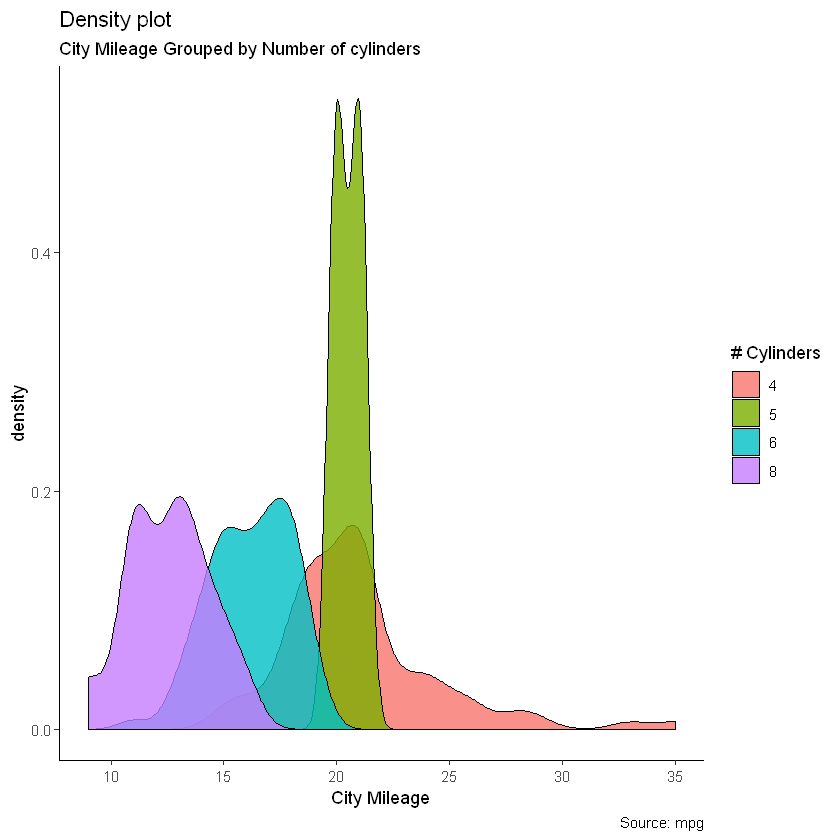

In [31]:
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(cty))
# 密度图
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

### 4.4 箱形图(Box Plot)
箱形图是研究分布的绝佳工具。它还可以显示多个组内的分布，以及中位数，范围和离群值（如果有）。
框内的黑线代表中位数。盒子的顶部是75％位数，盒子的底部是25％位数。线的端点的距离为1.5 * IQR，其中IQR或四分位数间距是第25和第75个百分位数之间的距离。端点外的点标记为点，通常被视为极限点。




In [32]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


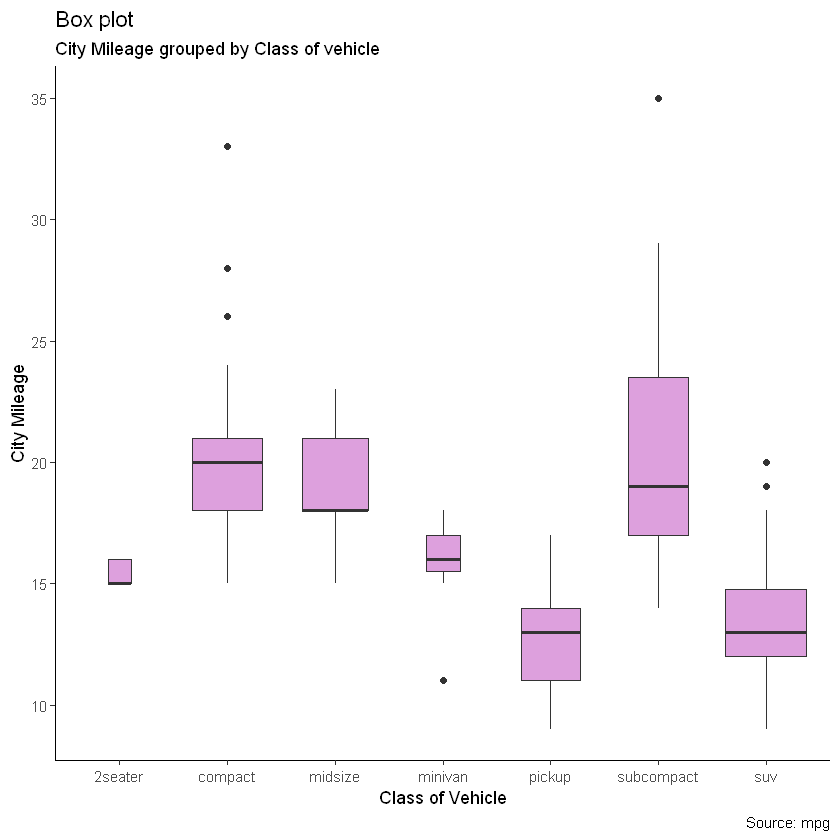

In [33]:
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="City Mileage grouped by Class of vehicle",
         caption="Source: mpg",
         x="Class of Vehicle",
         y="City Mileage")

Warning message:
"package 'ggthemes' was built under R version 3.6.3"


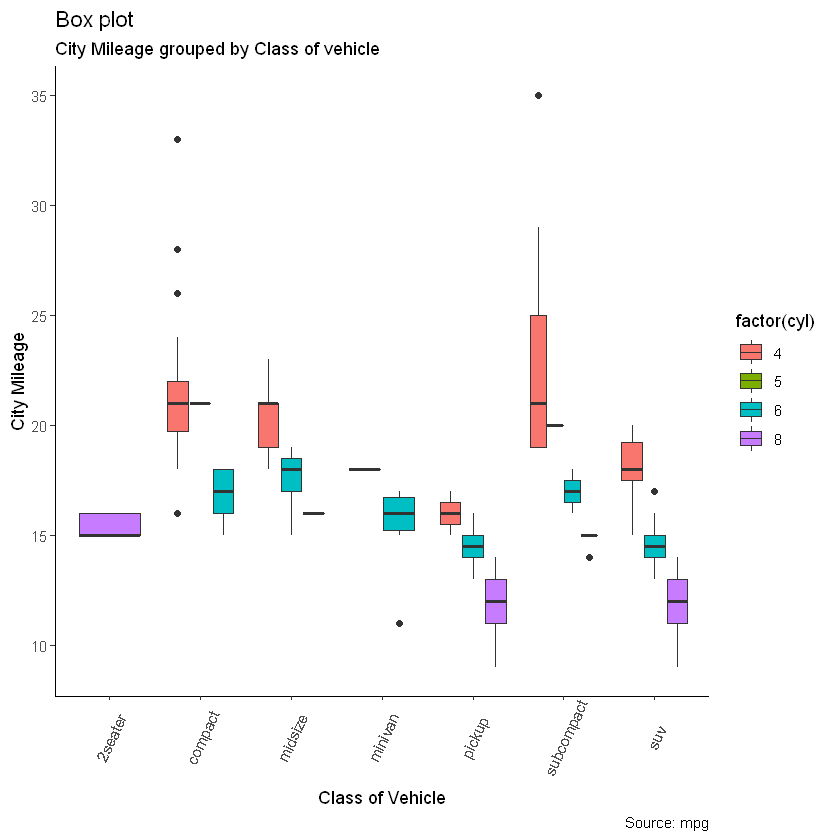

In [34]:
library(ggthemes)
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(aes(fill=factor(cyl))) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Box plot", 
       subtitle="City Mileage grouped by Class of vehicle",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

### 4.5 点+箱形图(Dot + Box Plot)
除了箱形图提供的信息外，点图还可以按每个组的摘要统计信息的形式提供更清晰的信息。这些点交错排列，以使每个点代表一个观测值。因此，在下图中，给定制造商的点数将与源数据中该制造商的行数匹配。



`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



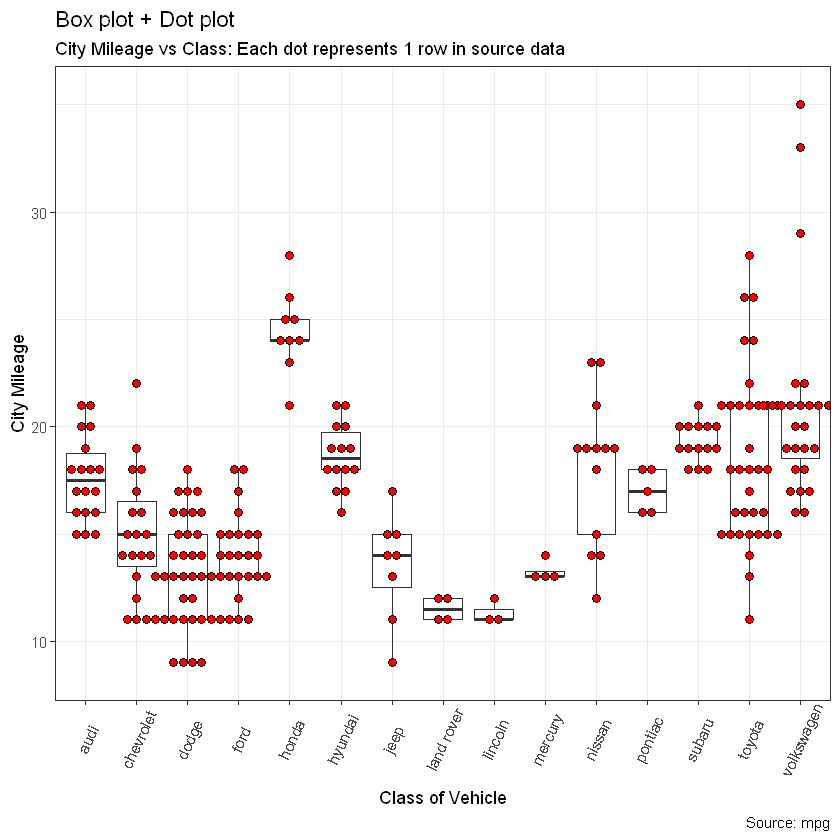

In [35]:
library(ggplot2)
theme_set(theme_bw())

# plot
g <- ggplot(mpg, aes(manufacturer, cty))
g + geom_boxplot() + 
  # binaxis bin x or y
  # stackdir 点在箱形图的位置
  geom_dotplot(binaxis='y', 
               stackdir='center', 
               dotsize = .5, 
               fill="red") +
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Box plot + Dot plot", 
       subtitle="City Mileage vs Class: Each dot represents 1 row in source data",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

### 4.6 簇状箱形图(Tufte Boxplot)  
由ggthemes软件包提供的簇状箱形图灵感来自爱德华•簇绒的作品。Tufte的方块图只是一个极简的方块图，具有视觉吸引力。

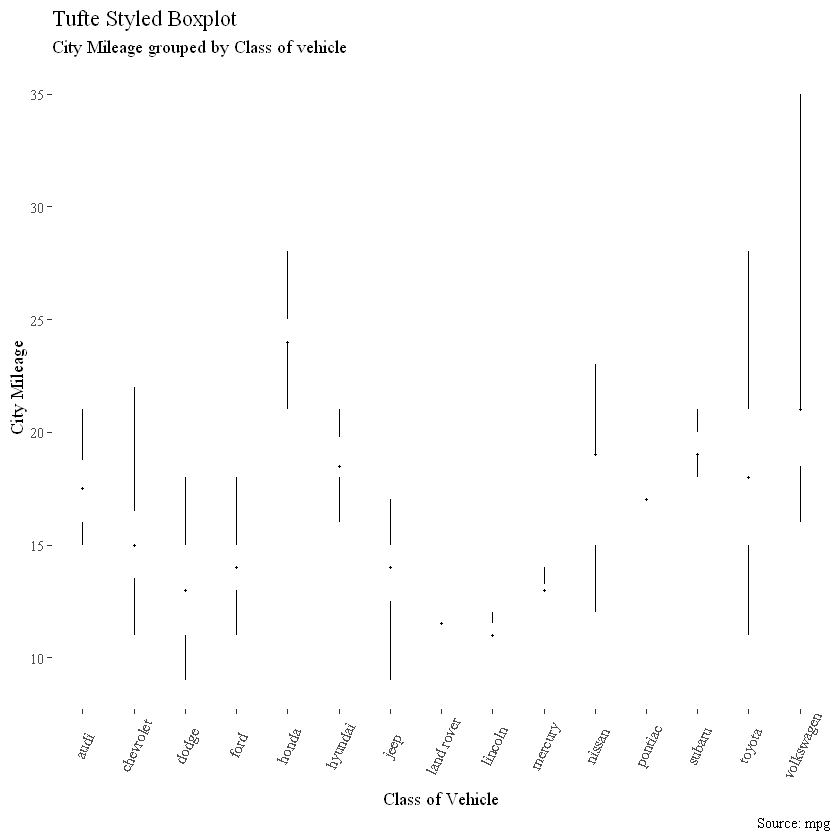

In [36]:
library(ggthemes)
library(ggplot2)
theme_set(theme_tufte())  # from ggthemes

# plot
g <- ggplot(mpg, aes(manufacturer, cty))
g + geom_tufteboxplot() + 
      theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
      labs(title="Tufte Styled Boxplot", 
           subtitle="City Mileage grouped by Class of vehicle",
           caption="Source: mpg",
           x="Class of Vehicle",
           y="City Mileage")

### 4.7 小提琴图(Violin Plot)

小提琴图类似于箱形图，但显示了组内的密度。没有像箱形图那样提供太多信息。可以使用geom_violin()绘制。



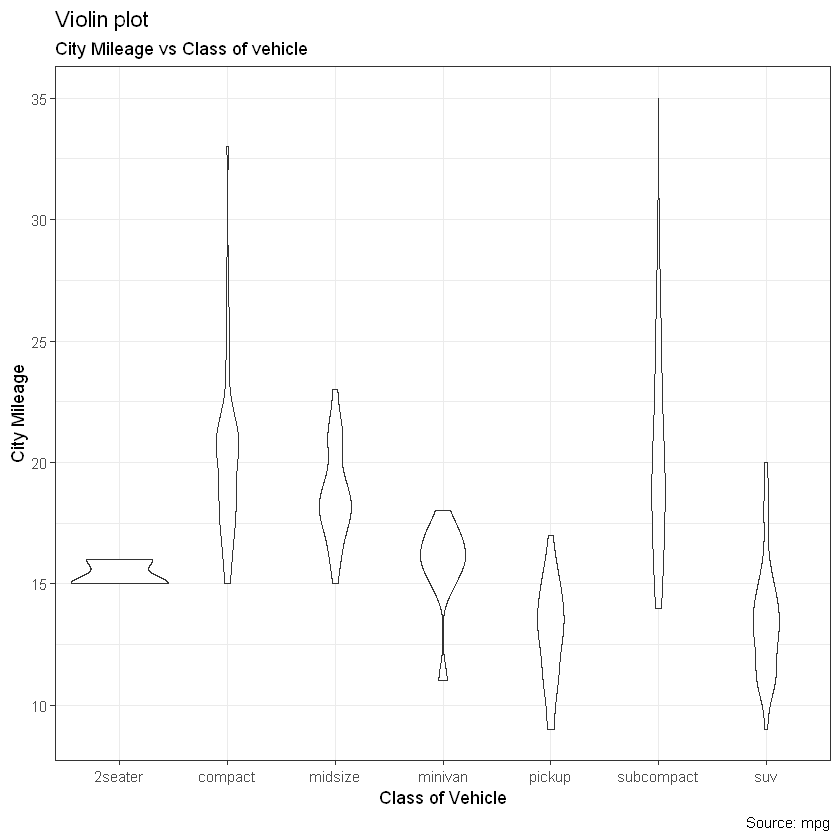

In [37]:
library(ggplot2)
theme_set(theme_bw())

# plot
g <- ggplot(mpg, aes(class, cty))
g + geom_violin() + 
  labs(title="Violin plot", 
       subtitle="City Mileage vs Class of vehicle",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

### 4.8 人口金字塔(Population Pyramid)
人口金字塔提供了一种独特的方式来可视化有多少人口或人口百分比属于某一类别。下面的金字塔是一个很好的例子，说明在电子邮件营销活动漏斗的每个阶段都保留了多少用户。

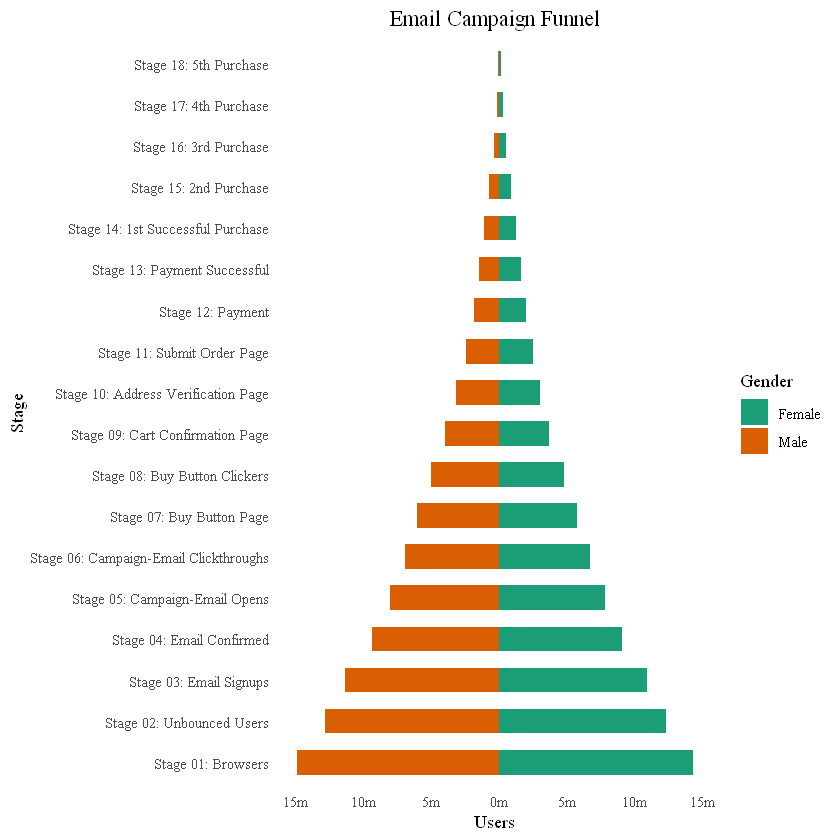

In [38]:
library(ggplot2)
library(ggthemes)
# turns of scientific notations like 1e+40 不使用科学计数
options(scipen = 999)  

# Read data
email_campaign_funnel <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# X Axis Breaks and Labels 
brks <- seq(-15000000, 15000000, 5000000)
lbls = paste0(as.character(c(seq(15, 0, -5), seq(5, 15, 5))), "m")

# Plot
ggplot(email_campaign_funnel, aes(x = Stage, y = Users, fill = Gender)) +   # Fill column
                             # draw the bars 绘柱状图
                              geom_bar(stat = "identity", width = .6) +   
                              scale_y_continuous(breaks = brks,   # Breaks
                                                 labels = lbls) + # Labels
                              coord_flip() +  # Flip axes
                              labs(title="Email Campaign Funnel") +
                              theme_tufte() +  # Tufte theme from ggfortify
                              theme(plot.title = element_text(hjust = .5), 
                                    axis.ticks = element_blank()) +   # Centre plot title
                              scale_fill_brewer(palette = "Dark2")  # Color palette

## 5 组成(Composition)
本节主要内容有：
+ 华夫饼图(Waffle Chart)
+ 饼图(Pie Chart)
+ 矩形树图(Treemap)
+ 条形图(Bar Chart)

## 5.1 华夫饼图(Waffle Chart)
华夫饼图又名方格百分比图。华夫饼图是显示总人口分类组成的一种很好的方法。虽然没有直接的函数，但是可以通过使用geom_tile（）函数巧妙地操纵ggplot2来表达。下面的模板应该可以帮助您创建自己的华夫饼。

In [39]:
var <- mpg$class  # the categorical data 

## Prep data (nothing to change here)
nrows <- 10
df <- expand.grid(y = 1:nrows, x = 1:nrows)
categ_table <- round(table(var) * ((nrows*nrows)/(length(var))))
categ_table
#>   2seater    compact    midsize    minivan     pickup subcompact        suv 
#>         2         20         18          5         14         15         26 

# 打印数据
df$category <- factor(rep(names(categ_table), categ_table))  
# NOTE: if sum(categ_table) is not 100 (i.e. nrows^2), it will need adjustment to make the sum to 100.


var
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         2         20         18          5         14         15         26 

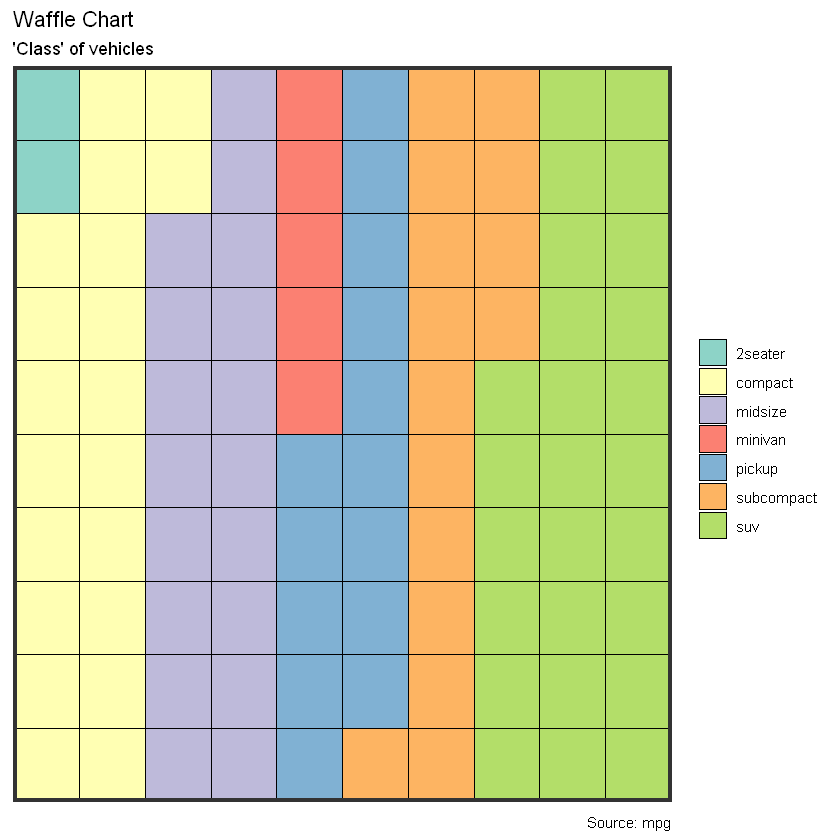

In [40]:

## Plot
ggplot(df, aes(x = x, y = y, fill = category)) + 
        # 画热图
        geom_tile(color = "black", size = 0.5) +
        scale_x_continuous(expand = c(0, 0)) +
        scale_y_continuous(expand = c(0, 0), trans = 'reverse') +
        scale_fill_brewer(palette = "Set3") +
        labs(title="Waffle Chart", subtitle="'Class' of vehicles",
             caption="Source: mpg") + 
        theme(panel.border = element_rect(size = 2),
              plot.title = element_text(size = rel(1.2)),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks = element_blank(),
              legend.title = element_blank(),
              legend.position = "right")

### 5.2 饼图(Pie Chart)
饼图，一种典型的显示构图的方法，就所传达的信息而言，相当于华夫饼图。但是在ggplot2中使用coord_polar（）实现起来有点棘手。

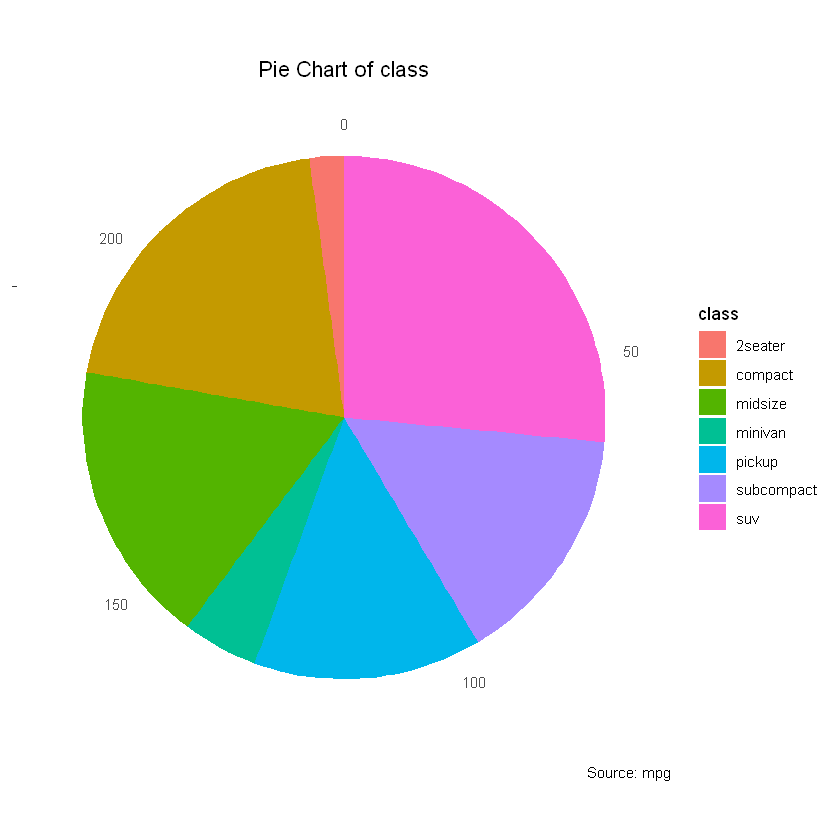

In [41]:
library(ggplot2)
theme_set(theme_classic())

# Source: Frequency table
df <- as.data.frame(table(mpg$class))
colnames(df) <- c("class", "freq")
pie <- ggplot(df, aes(x = "", y=freq, fill = factor(class))) + 
  geom_bar(width = 1, stat = "identity") +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Pie Chart of class", 
       caption="Source: mpg")

pie + coord_polar(theta = "y", start=0)


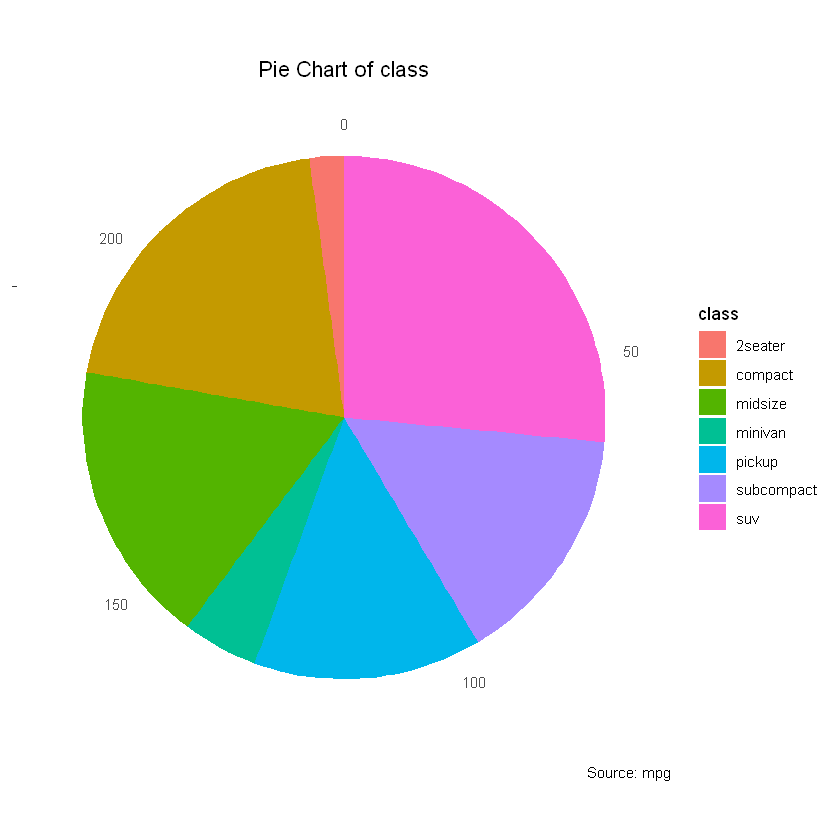

In [42]:

# Source: Categorical variable.
# mpg$class
pie <- ggplot(mpg, aes(x = "", fill = factor(class))) + 
  geom_bar(width = 1) +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Pie Chart of class", 
       caption="Source: mpg")
  
pie + coord_polar(theta = "y", start=0)

### 5.3 矩形树图(Treemap)
Treemap是一种使用嵌套矩形显示分层数据的好方法。treemapify包提供了必要的功能，可以将数据转换为所需的格式（treemapify）并绘制实际的绘图（ggplotify）。
为了创建树形图，必须使用将数据转换为所需的格式treemapify()。重要的要求是，您的数据必须具有一个变量，每个变量描述area图块的，fill颜色变量，具有图块的变量label以及最后一个父级group。主要用treemap包实现，具体见：
>https://github.com/wilkox/treemapify

In [43]:
library(ggplot2)
library(treemapify)
head(G20)

Warning message:
"package 'treemapify' was built under R version 3.6.3"


region,country,gdp_mil_usd,hdi,econ_classification,hemisphere
<fct>,<fct>,<int>,<dbl>,<fct>,<fct>
Africa,South Africa,384315,0.629,Developing,Southern
North America,United States,15684750,0.937,Advanced,Northern
North America,Canada,1819081,0.911,Advanced,Northern
North America,Mexico,1177116,0.775,Developing,Northern
South America,Brazil,2395968,0.730,Developing,Southern
South America,Argentina,474954,0.811,Developing,Southern


#### 5.3.1简单的矩形树形图
在树形图中，每个图块代表一个观察值，图块的面积与变量成比例。让我们首先绘制一个树状图，每个图块代表一个G-20国家。瓷砖的面积将映射到该国的GDP，瓷砖的填充色将映射到其HDI（人类发展指数）。geom_treemap是用于此目的的基本几何图形。

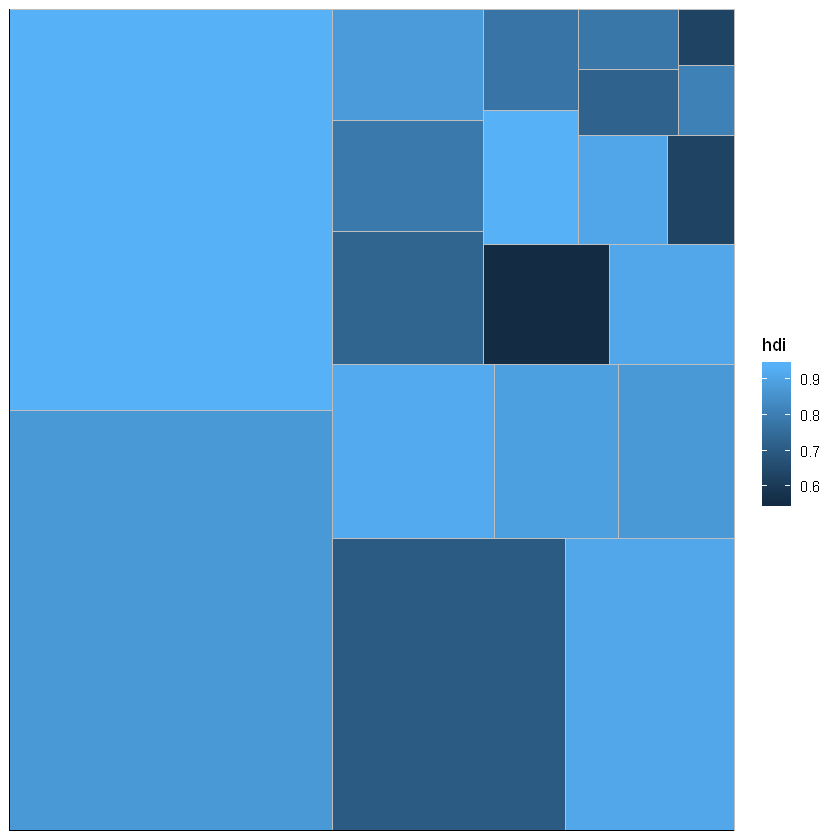

In [44]:
ggplot(G20, aes(area = gdp_mil_usd, fill = hdi)) +
  geom_treemap()

如果不知道每个图块所代表的国家/地区，该图就不是很有用。geom_treemap_text可用于向每个图块添加文本标签。它使用 ggfittext包来调整文本大小，使其适合图块。除了您将在geom_text，fontface或中使用的标准文本格式美观colour之外，我们还可以传递特定于ggfittext的其他选项。例如，我们可以使用将文本放置在图块的中央place = "centre"，然后使用grow = TRUE展开文本以填充尽可能多的图块。



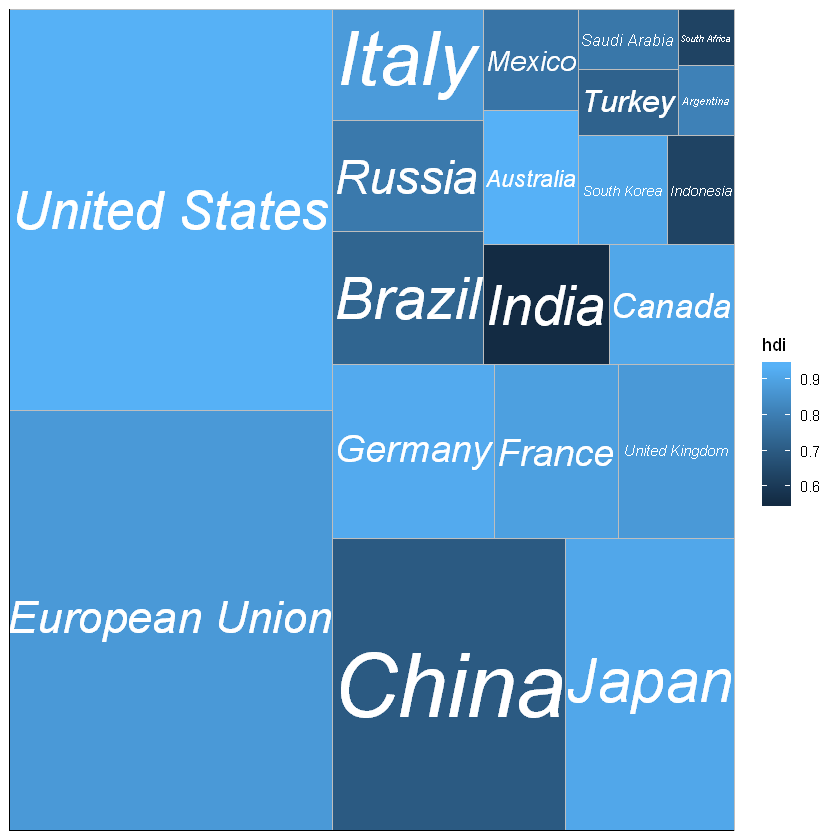

In [45]:
ggplot(G20, aes(area = gdp_mil_usd, fill = hdi, label = country)) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "white", place = "centre",
                    grow = TRUE)

#### 5.3.2 分组平铺
geom_treemap通过传递子组美学支持在treemap中对瓷砖进行子组化。让我们按地区对国家分组，用geom treemap_subgroup_border在每个子组周围画一个边界，并用geom treemap_subgroup_文本标记每个子组。geom_treemap_subgroup_text对于文本放置和大小调整采用与geom_treemap_text相同的参数。

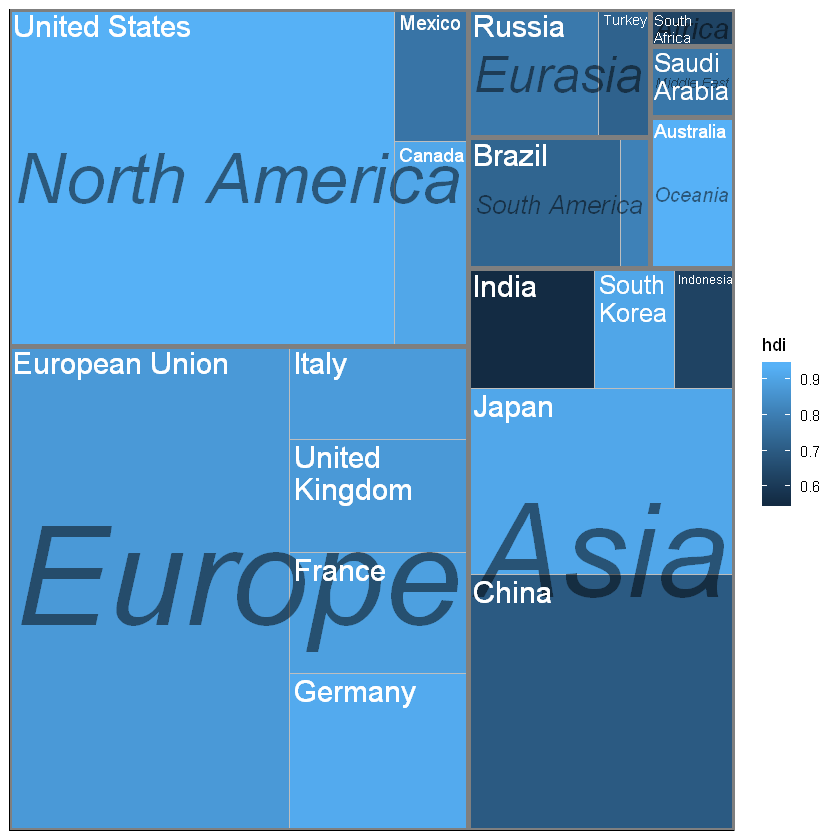

In [46]:
ggplot(G20, aes(area = gdp_mil_usd, fill = hdi, label = country,
                subgroup = region)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  geom_treemap_subgroup_text(place = "centre", grow = T, alpha = 0.5, colour =
                             "black", fontface = "italic", min.size = 0) +
  geom_treemap_text(colour = "white", place = "topleft", reflow = T)

注意阿根廷没有标签。geom_treemap_文本将隐藏不适合平铺的文本标签，除非缩小到最小大小以下（默认为4个点）。这可以使用min.size参数进行调整。
subgroup2和subgroup3美学支持多达三个嵌套级别的子组。这些子组的边框和文本标签可以使用geom treemap_subgroup2_border等绘制。请注意，ggplot2按照添加的顺序绘制打印层。这意味着可能会意外地将子组边界的一层与另一层隐藏起来。通常，最好按从深到浅的顺序添加边界层，即geom_treemap_subgroup3_border然后geom_treemap_subgroup2_border然后geom_treemap_subgroup2_border。


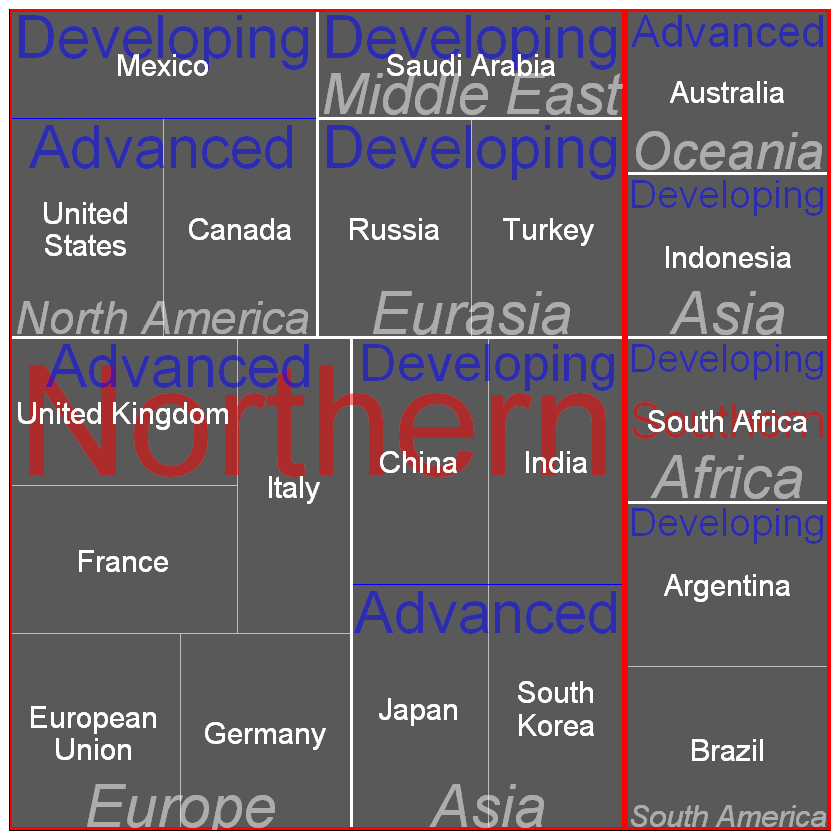

In [47]:
ggplot(G20, aes(area = 1, label = country, subgroup = hemisphere,
                subgroup2 = region, subgroup3 = econ_classification)) +
  geom_treemap() +
  geom_treemap_subgroup3_border(colour = "blue", size = 1) +
  geom_treemap_subgroup2_border(colour = "white", size = 3) +
  geom_treemap_subgroup_border(colour = "red", size = 5) +
  geom_treemap_subgroup_text(place = "middle", colour = "red", alpha = 0.5, grow = T) +
  geom_treemap_subgroup2_text(colour = "white", alpha = 0.5, fontface = "italic") +
  geom_treemap_subgroup3_text(place = "top", colour = "blue", alpha = 0.5) +
  geom_treemap_text(colour = "white", place = "middle", reflow = T)

如上图所示，并不能保证最终的情节会好看。
与任何ggplot2绘图一样，treemapify绘图可以分面、缩放、主题化等。

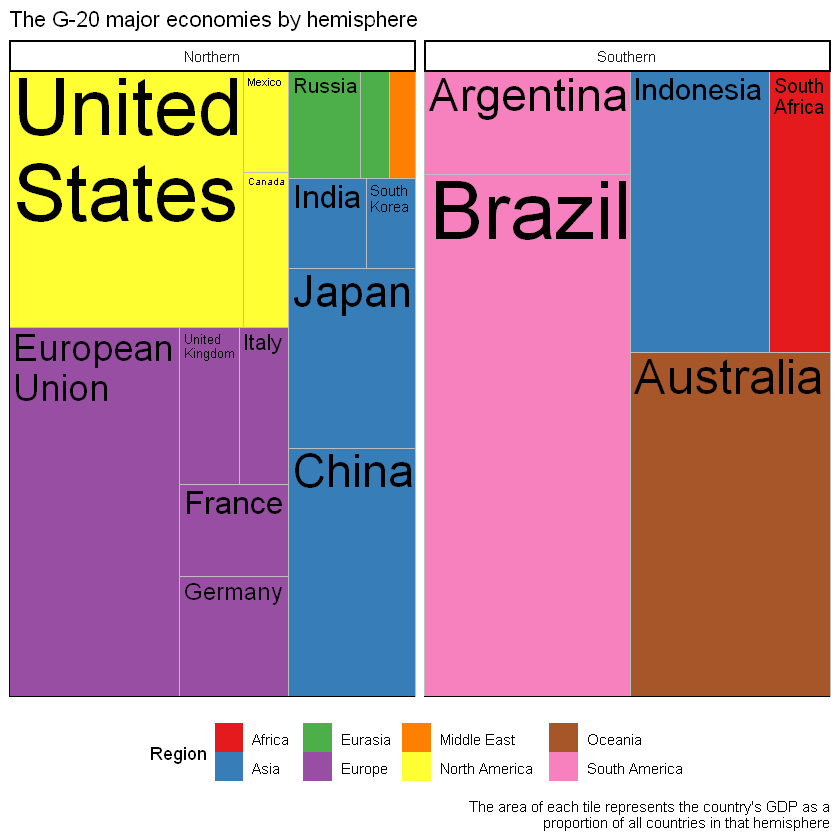

In [48]:
ggplot(G20, aes(area = gdp_mil_usd, fill = region, label = country, subgroup = region)) +
  geom_treemap() +
  geom_treemap_text(grow = T, reflow = T, colour = "black") +
  facet_wrap( ~ hemisphere) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "bottom") +
  labs(
    title = "The G-20 major economies by hemisphere",
    caption = "The area of each tile represents the country's GDP as a
      proportion of all countries in that hemisphere",
    fill = "Region"
  )

## 5.4 条形图(Bar Chart)  
默认情况下，geom_bar()将stat设置为count。这意味着，当您仅提供连续的X变量（而不提供Y变量）时，它将尝试从数据中生成直方图。为了使条形图创建条形而不是直方图，您需要做两件事。
1. 设置stat=identity
2. 同时提供x和y

条形图可以从分类列变量或单独的频率表中绘制。通过调整width，您可以调整bar的厚度。如果您的数据源是频率表，也就是说，如果您不希望ggplot计算计数，则需要stat=identity在内设置geom_bar()。






In [49]:
freqtable <- table(mpg$manufacturer)
df <- as.data.frame.table(freqtable)
head(df)

Var1,Freq
<fct>,<int>
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14


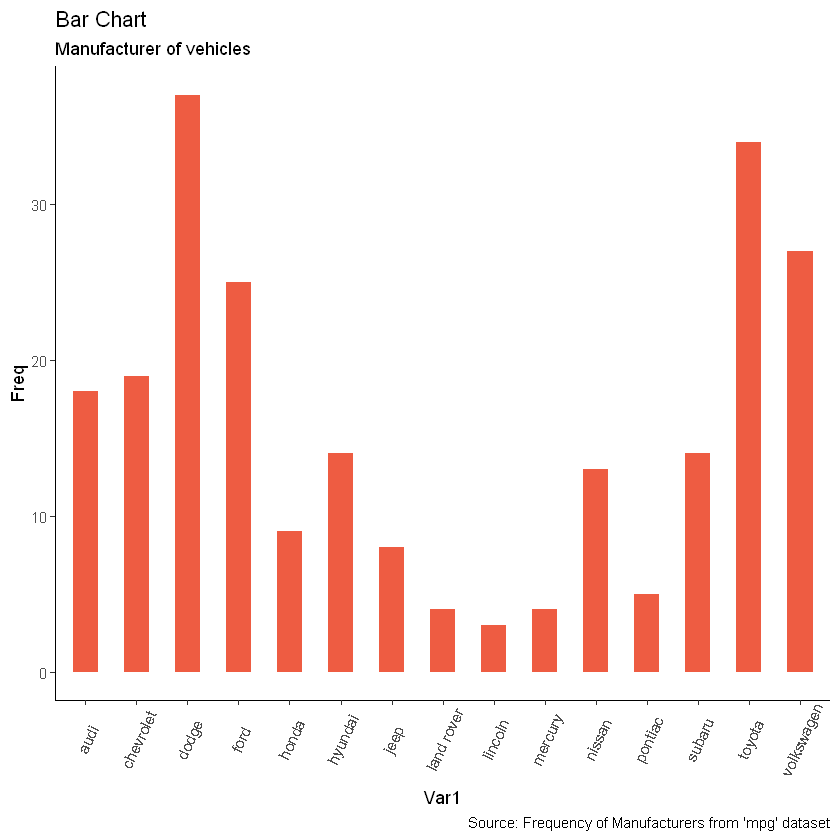

In [50]:
# plot
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(df, aes(Var1, Freq))
g + geom_bar(stat="identity", width = 0.5, fill="tomato2") + 
      labs(title="Bar Chart", 
           subtitle="Manufacturer of vehicles", 
           caption="Source: Frequency of Manufacturers from 'mpg' dataset") +
      theme(axis.text.x = element_text(angle=65, vjust=0.6))

它也可以直接从列变量计算。在这种情况下，只提供X，而没有设置stat=identity。

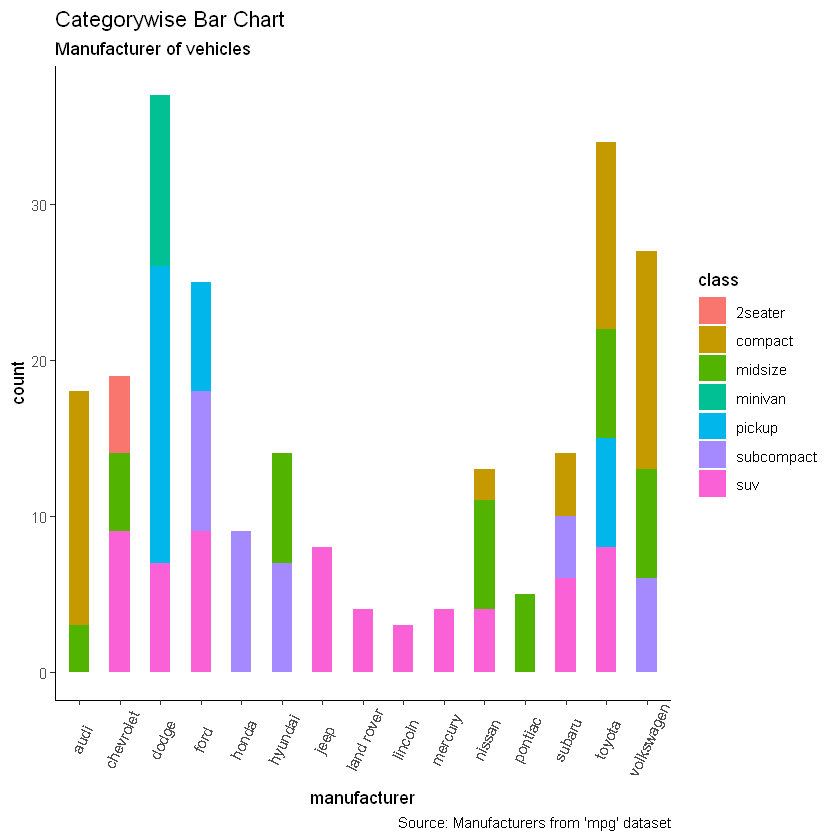

In [51]:
# From on a categorical column variable
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) +
  labs(title="Categorywise Bar Chart", 
       subtitle="Manufacturer of vehicles", 
       caption="Source: Manufacturers from 'mpg' dataset")

## 6 变化(Change)
本节主要内容有：
+ 时间序列图(Time Series Plot)
+ 堆积面积图(Stacked Area Chart)
+ 日历热图(Calendar Heatmap)
+ 季节性地块(Seasonal Plot)

### 6.1 时间序列图(Time Series Plot)
ggfortify程序包允许自动绘图直接从时间序列对象（ts）自动绘图。

Warning message:
"package 'ggfortify' was built under R version 3.6.1"
Registered S3 method overwritten by 'ggfortify':
  method        from 
  fortify.table ggalt



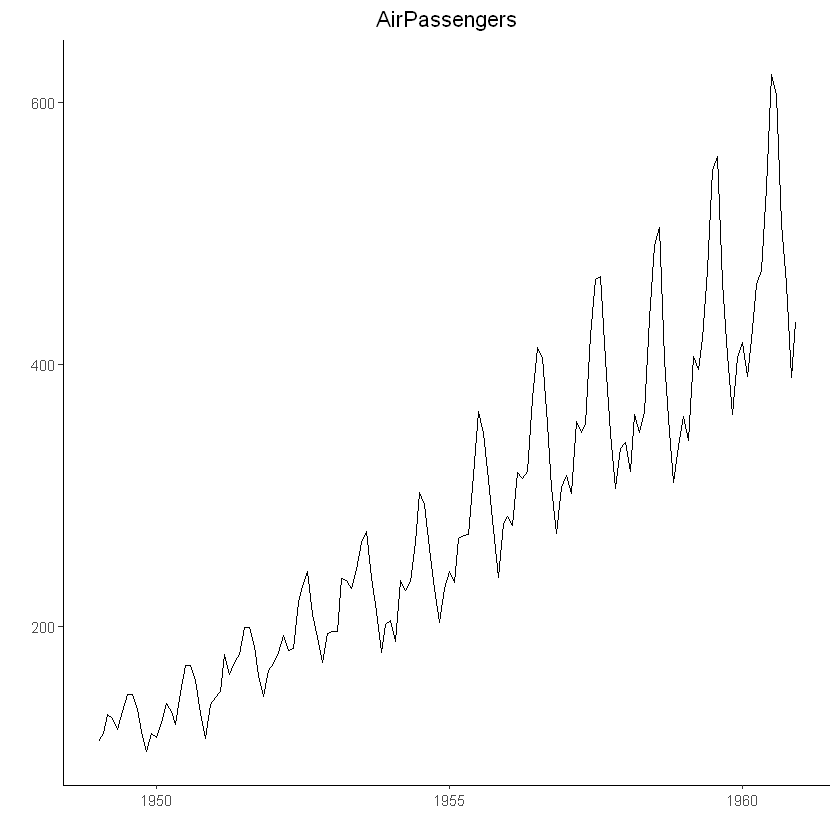

In [52]:
## From Timeseries object (ts)
library(ggplot2)
library(ggfortify)
theme_set(theme_classic())

economics$returns_perc <- c(0, diff(economics$psavert)/economics$psavert[-length(economics$psavert)])

# Plot 
autoplot(AirPassengers) + 
  labs(title="AirPassengers") + 
  theme(plot.title = element_text(hjust=0.5))

#### 6.1.1 数据帧中的时间序列图
使用geom_line()，也可以从中绘制时间序列（或折线图）data.frame。X轴断点默认情况下生成。在下面的示例中，中断每10年形成一次。



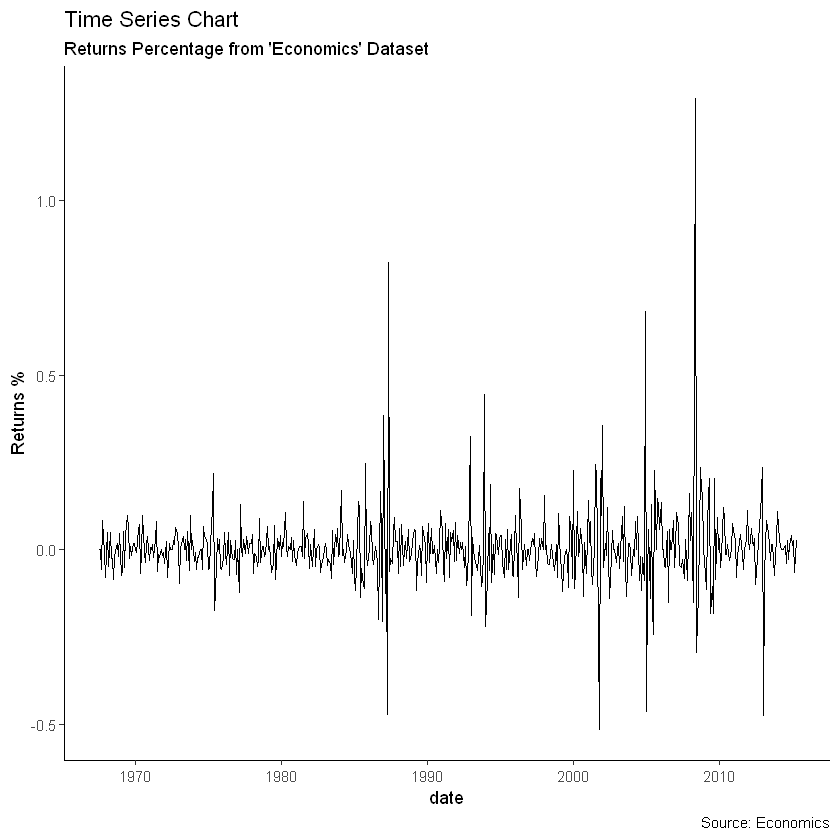

In [53]:
library(ggplot2)
theme_set(theme_classic())

# Allow Default X Axis Labels
ggplot(economics, aes(x=date)) + 
  geom_line(aes(y=returns_perc)) + 
  labs(title="Time Series Chart", 
       subtitle="Returns Percentage from 'Economics' Dataset", 
       caption="Source: Economics", 
       y="Returns %")

#### 6.1.2 时间序列图对于月度时间序列
如果要在X轴上设置自己的时间间隔（间隔），则需要使用scale_x_date()来设置间隔和标签。

Warning message:
"package 'lubridate' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




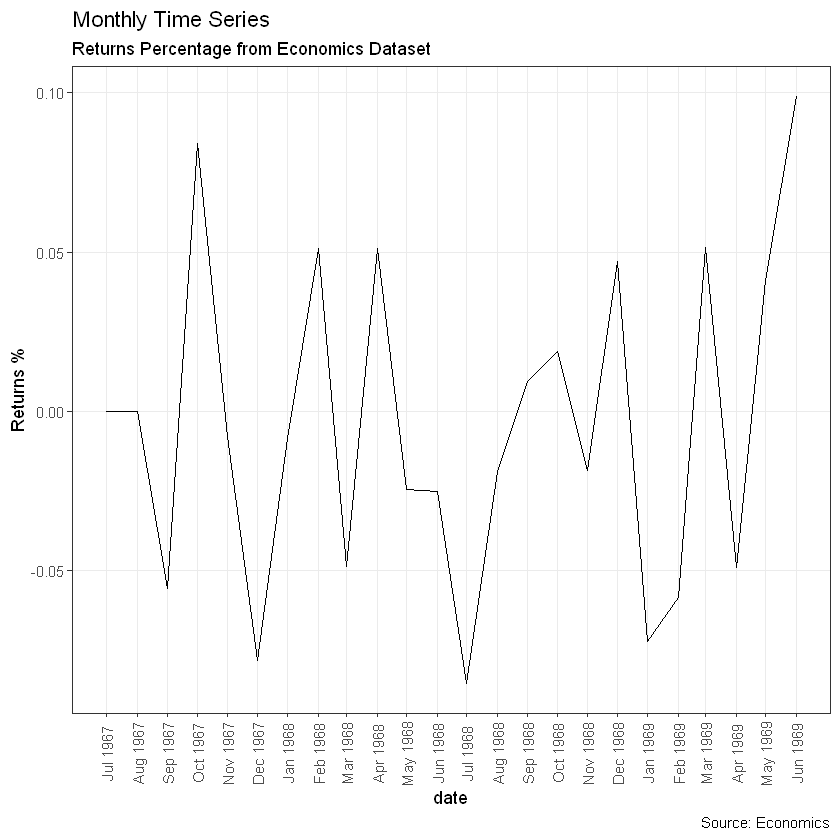

In [54]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

economics_m <- economics[1:24, ]

# labels and breaks for X axis text
lbls <- paste0(month.abb[month(economics_m$date)], " ", lubridate::year(economics_m$date))
brks <- economics_m$date

# plot
ggplot(economics_m, aes(x=date)) + 
  geom_line(aes(y=returns_perc)) + 
  labs(title="Monthly Time Series", 
       subtitle="Returns Percentage from Economics Dataset", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

#### 6.1.3 时间序列图对于年度时间序列


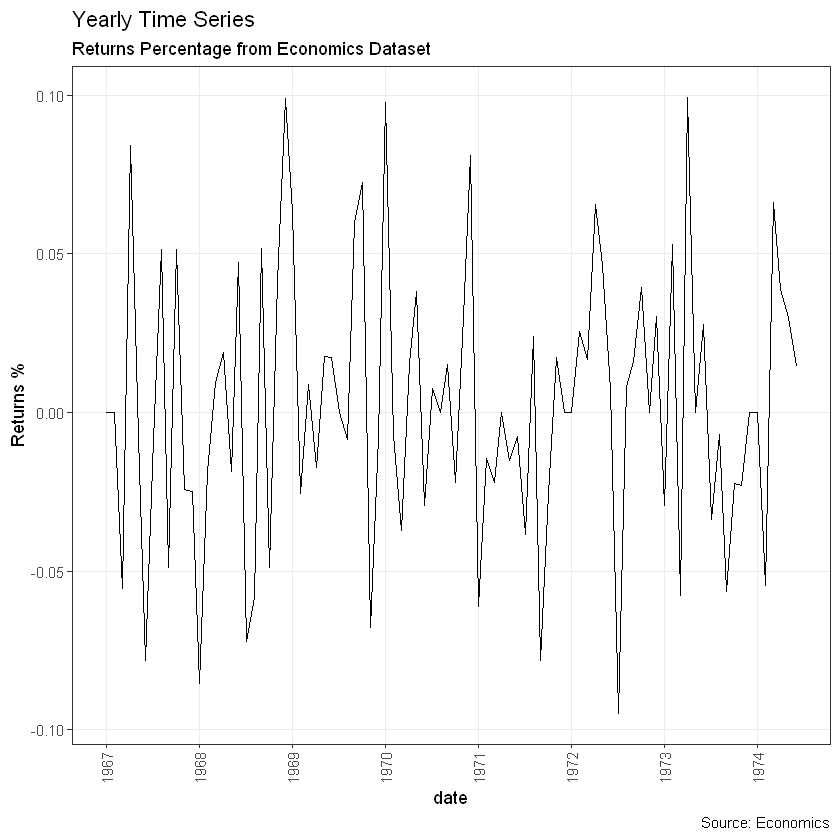

In [55]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

economics_y <- economics[1:90, ]

# labels and breaks for X axis text
brks <- economics_y$date[seq(1, length(economics_y$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(economics_y, aes(x=date)) + 
  geom_line(aes(y=returns_perc)) + 
  labs(title="Yearly Time Series", 
       subtitle="Returns Percentage from Economics Dataset", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

#### 6.1.4 长数据格式的时间序列图：同一数据帧列中的多个时间序列
在本例中，我从长数据格式构造ggplot。这就是说，所有列的列名和各自的值仅堆叠在两个变量中（变量和值分别）。如果您要将此数据转换为宽格式，它看起来就像经济学数据集。
在下面的示例中，为值列绘制geom_线，并将aes（col）设置为variable。这样，只需调用一次geom_line，就可以绘制多条彩色线，每个彩色线对应变量列中的每个唯一值。scale_x_date（）更改x轴打断和标签，scale_color_手动更改线的颜色。

In [56]:
data(economics_long, package = "ggplot2")
head(economics_long)

date,variable,value,value01
<date>,<chr>,<dbl>,<dbl>
1967-07-01,pce,506.7,0.0000000000
1967-08-01,pce,509.8,0.0002652497
1967-09-01,pce,515.6,0.0007615234
1967-10-01,pce,512.2,0.0004706043
1967-11-01,pce,517.4,0.0009155394
1967-12-01,pce,525.1,0.0015743854


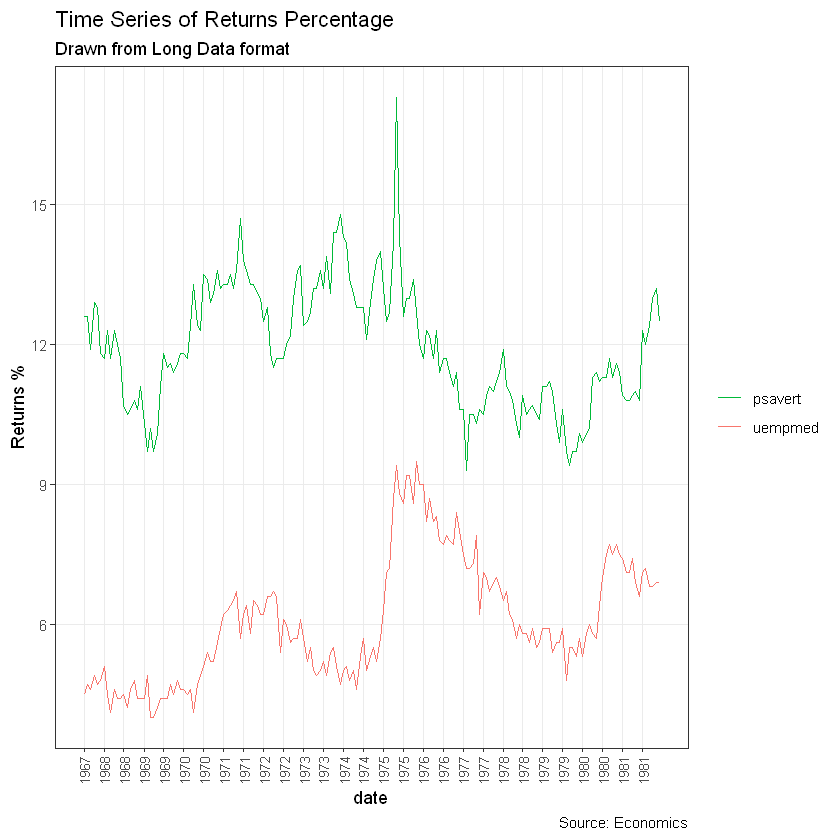

In [57]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

df <- economics_long[economics_long$variable %in% c("psavert", "uempmed"), ]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_line(aes(y=value, col=variable)) + 
  labs(title="Time Series of Returns Percentage", 
       subtitle="Drawn from Long Data format", 
       caption="Source: Economics", 
       y="Returns %", 
       color=NULL) +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_color_manual(labels = c("psavert", "uempmed"), 
                     values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, size = 8),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

#### 6.1.5 宽数据格式的时间序列图：数据框中多列的数据
如果要从宽数据格式创建时间序列（甚至其他类型的绘图），则必须通过为每一行调用geom_line（）来手动绘制每一行。因此，默认情况下不会绘制图例。

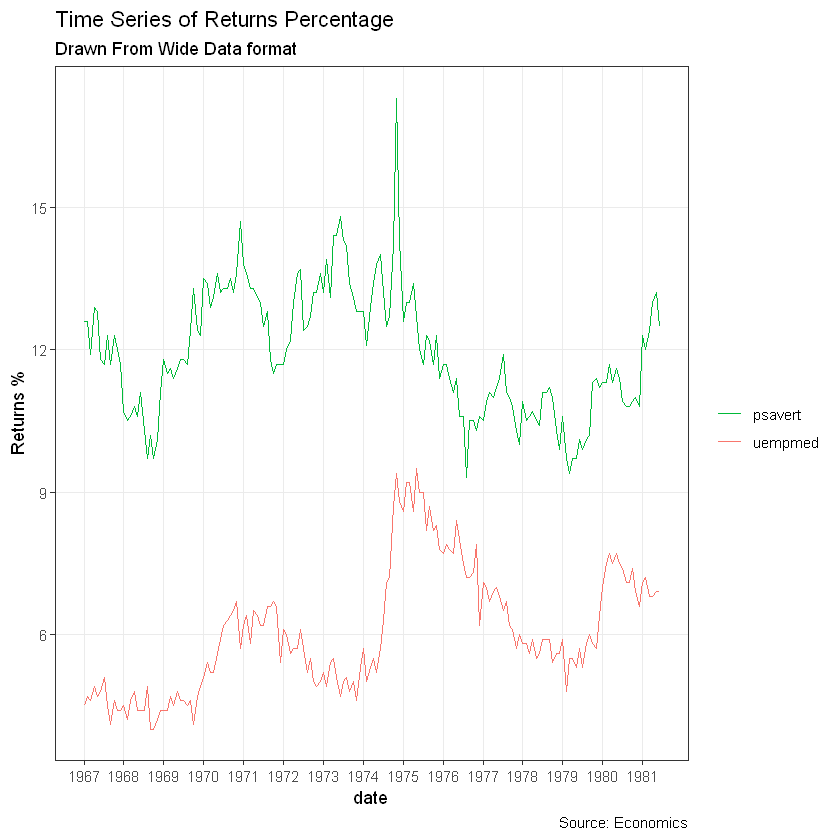

In [58]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

df <- economics[, c("date", "psavert", "uempmed")]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_line(aes(y=psavert, col="psavert")) + 
  geom_line(aes(y=uempmed, col="uempmed")) + 
  labs(title="Time Series of Returns Percentage", 
       subtitle="Drawn From Wide Data format", 
       caption="Source: Economics", y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_color_manual(name="", 
                     values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(panel.grid.minor = element_blank())  # turn off minor grid

### 6.2 堆积面积图(Stacked Area Chart)
堆积面积图就像折线图一样，只不过图下的区域全部是彩色的。通常在以下情况下使用：
+ 您想描述数量或体积（而不是价格）随时间变化的方式
+ 您有许多数据点。对于很少的数据点，请考虑绘制条形图。
+ 您想要显示各个组件的贡献。

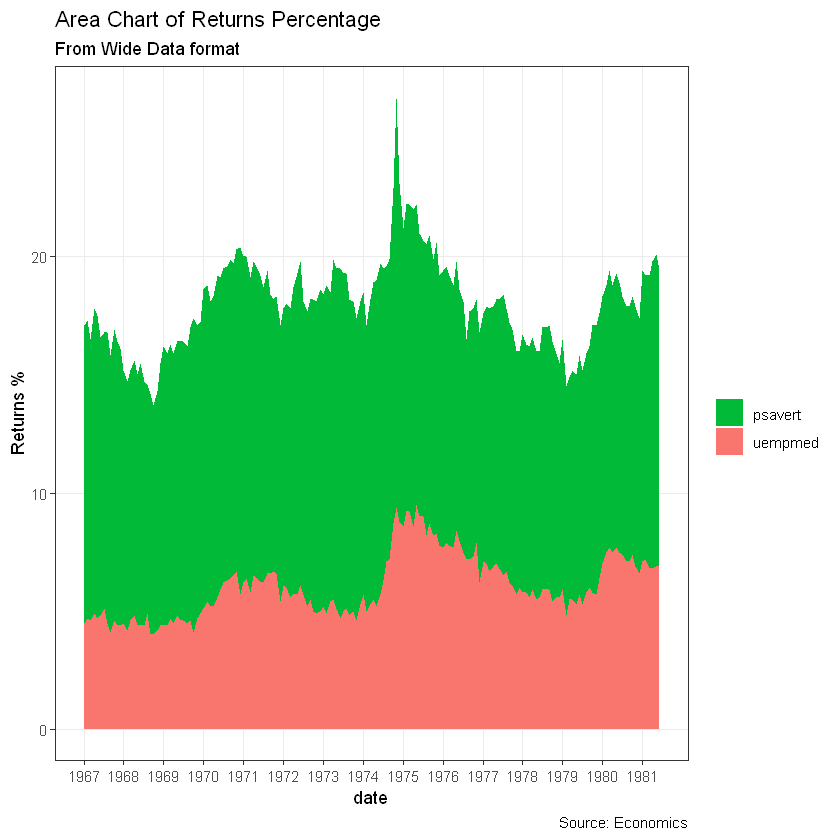

In [59]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

df <- economics[, c("date", "psavert", "uempmed")]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_area(aes(y=psavert+uempmed, fill="psavert")) + 
  geom_area(aes(y=uempmed, fill="uempmed")) + 
  labs(title="Area Chart of Returns Percentage", 
       subtitle="From Wide Data format", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_fill_manual(name="", 
                    values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(panel.grid.minor = element_blank())  # turn off minor grid

### 6.3 日历热图(Calendar Heatmap)
当您想在实际日历本身上查看诸如股价之类的度量标准的变化时，尤其是高点和低点时，日历热图是一个很好的工具。它在视觉上强调随时间变化，而不是实际值本身。可以使用来实现geom_tile。但是，以正确的格式获取数据更多地与数据准备有关，而不是与绘图本身有关。

year,yearmonthf,monthf,week,monthweek,weekdayf,VIX.Close
<int>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>
2012,1月 2012,Jan,1,1,Tue,22.97
2012,1月 2012,Jan,1,1,Wed,22.22
2012,1月 2012,Jan,1,1,Thu,21.48
2012,1月 2012,Jan,1,1,Fri,20.63
2012,1月 2012,Jan,2,2,Mon,21.07
2012,1月 2012,Jan,2,2,Tue,20.69


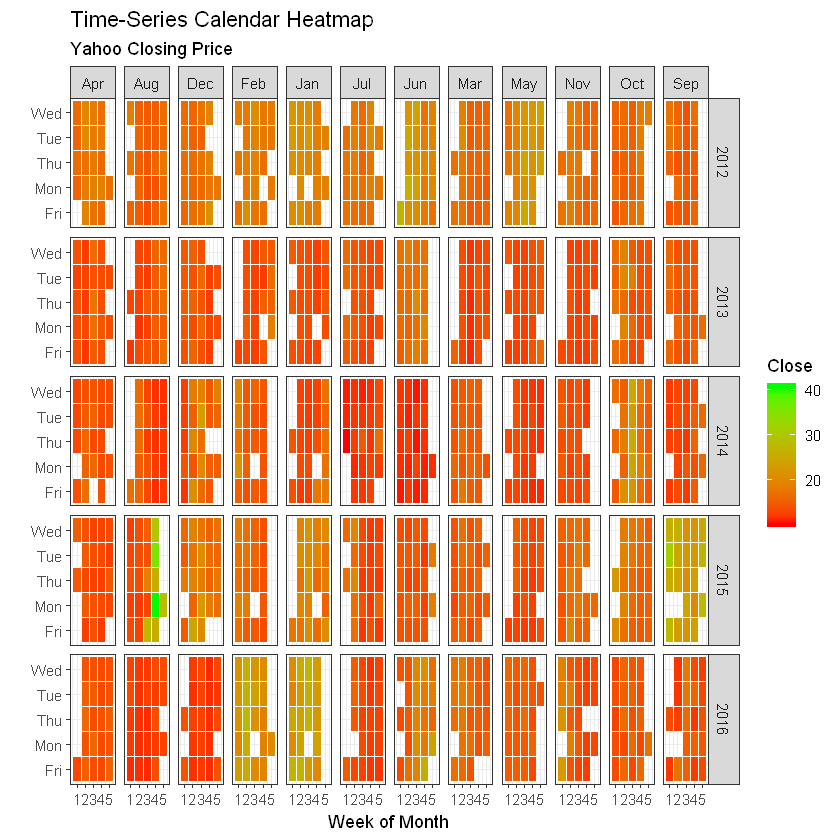

In [61]:
# http://margintale.blogspot.in/2012/04/ggplot2-time-series-heatmaps.html
library(ggplot2)
library(plyr)
library(scales)
library(zoo)

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")
df$date <- as.Date(df$date)  # format date
df <- df[df$year >= 2012, ]  # filter reqd years

# Create Month Week
df$yearmonth <- as.yearmon(df$date)
df$yearmonthf <- factor(df$yearmonth)
df <- ddply(df,.(yearmonthf), transform, monthweek=1+week-min(week))  # compute week number of month
df <- df[, c("year", "yearmonthf", "monthf", "week", "monthweek", "weekdayf", "VIX.Close")]
head(df)
#>   year yearmonthf monthf week monthweek weekdayf VIX.Close
#> 1 2012   Jan 2012    Jan    1         1      Tue     22.97
#> 2 2012   Jan 2012    Jan    1         1      Wed     22.22
#> 3 2012   Jan 2012    Jan    1         1      Thu     21.48
#> 4 2012   Jan 2012    Jan    1         1      Fri     20.63
#> 5 2012   Jan 2012    Jan    2         2      Mon     21.07
#> 6 2012   Jan 2012    Jan    2         2      Tue     20.69


# Plot
ggplot(df, aes(monthweek, weekdayf, fill = VIX.Close)) + 
  geom_tile(colour = "white") + 
  facet_grid(year~monthf) + 
  scale_fill_gradient(low="red", high="green") +
  labs(x="Week of Month",
       y="",
       title = "Time-Series Calendar Heatmap", 
       subtitle="Yahoo Closing Price", 
       fill="Close")

### 6.4 季节性地块(Seasonal Plot)
如果使用的是类ts或xts的时间序列对象，则可以通过使用forecast：：ggseasyplot绘制的季节图查看季节性波动。下面是使用AirPassengers和nottem时间序列的示例。你可以看到航空乘客的交通量逐年增加，同时交通量的季节性规律也在不断重复。诺丁汉的整体气温多年来没有上升，但绝对遵循季节性规律。

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



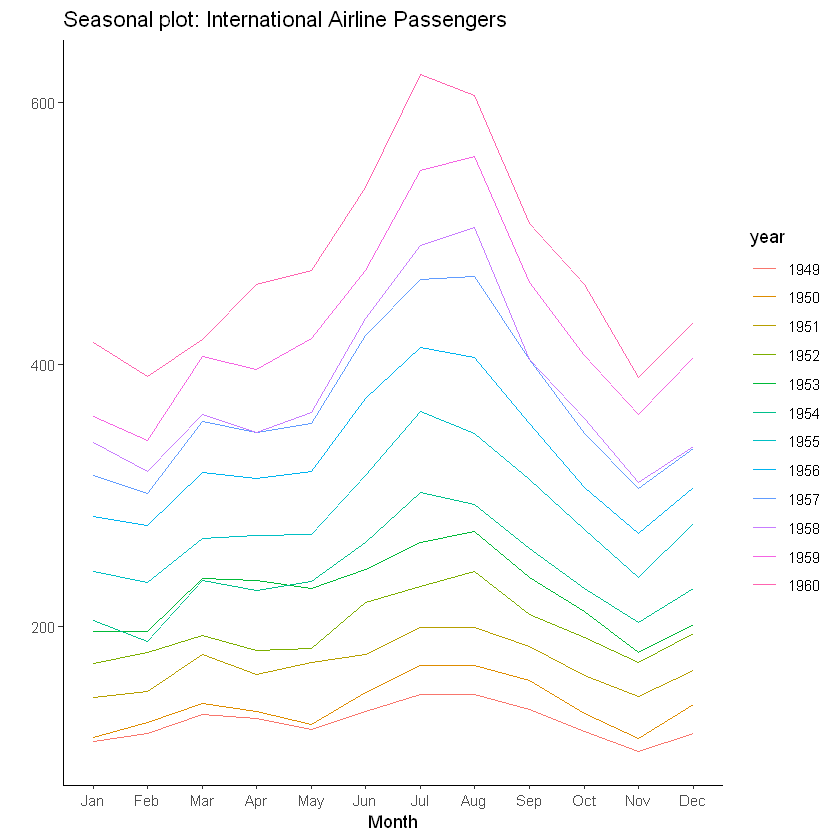

In [62]:
library(ggplot2)
library(forecast)
theme_set(theme_classic())

# Subset data
nottem_small <- window(nottem, start=c(1920, 1), end=c(1925, 12))  # subset a smaller timewindow

# Plot
ggseasonplot(AirPassengers) + labs(title="Seasonal plot: International Airline Passengers");

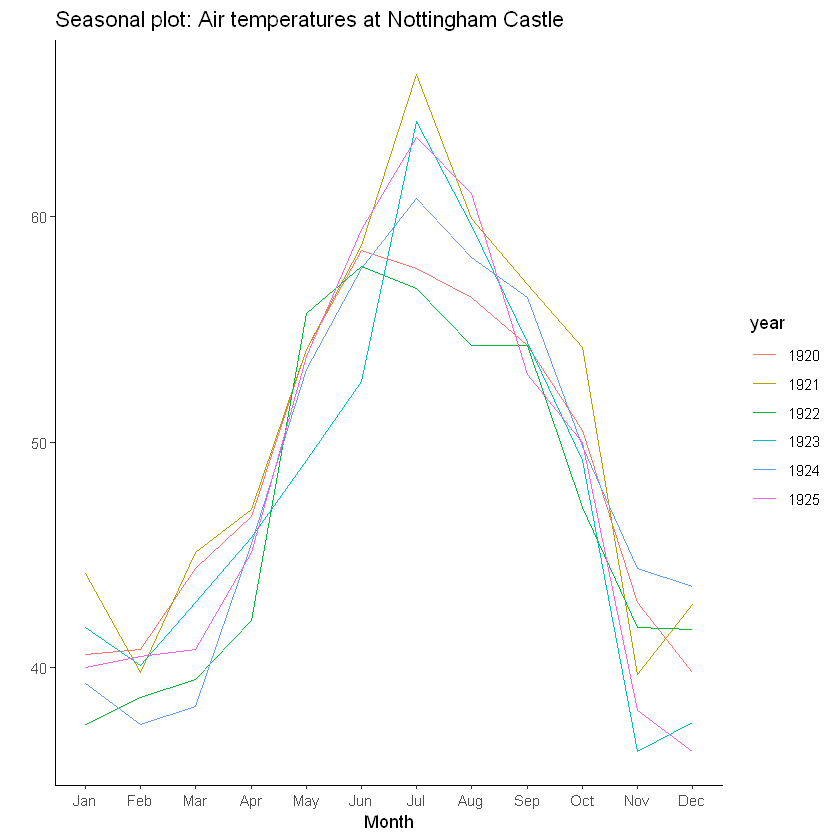

In [63]:
ggseasonplot(nottem_small) + labs(title="Seasonal plot: Air temperatures at Nottingham Castle");

## 7 群组(Groups)
本节主要内容有：
+ 分层树状图(Dendrogram)
+ 聚类(Clusters)

### 7.1 分层树状图(Dendrogram)

Warning message:
"package 'ggdendro' was built under R version 3.6.3"


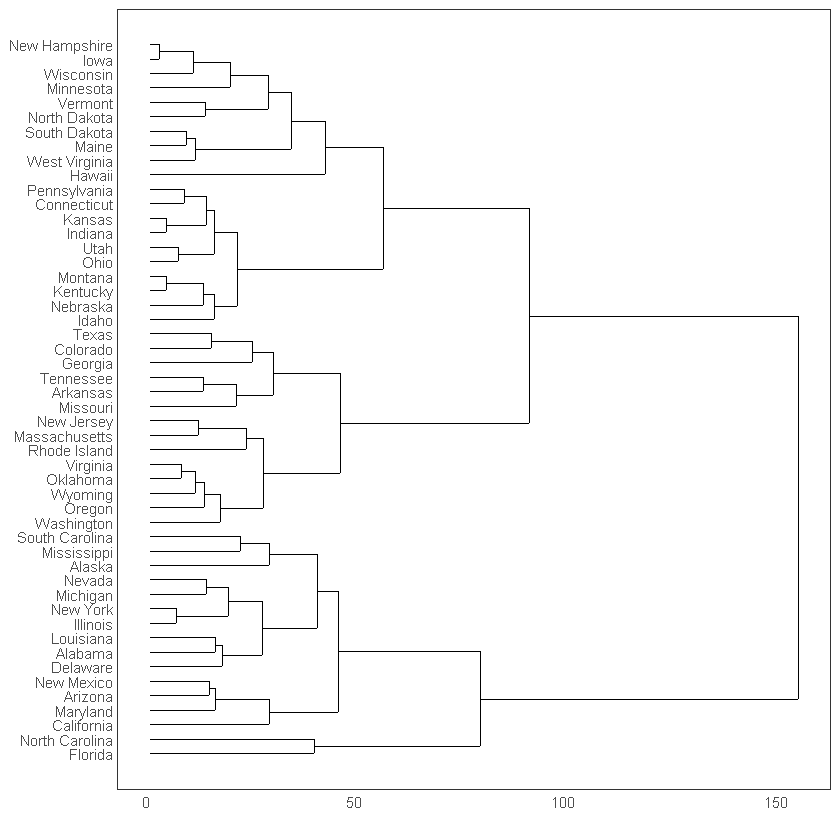

In [64]:
# install.packages("ggdendro")
library(ggplot2)
library(ggdendro)
theme_set(theme_bw())

hc <- hclust(dist(USArrests), "ave")  # hierarchical clustering

# plot
ggdendrogram(hc, rotate = TRUE, size = 2)

### 7.2 聚类(Clusters)
可以使用geom_encircle（）显示不同的簇或组。如果数据集具有多个弱特征，则可以计算主成分，并使用PC1和PC2作为X和Y轴绘制散点图。
geom_encircle（）可用于包围所需的组。唯一需要注意的是geom_circle（）的数据参数。您需要提供一个仅包含属于该组的观察（行）的子集数据帧作为数据参数。

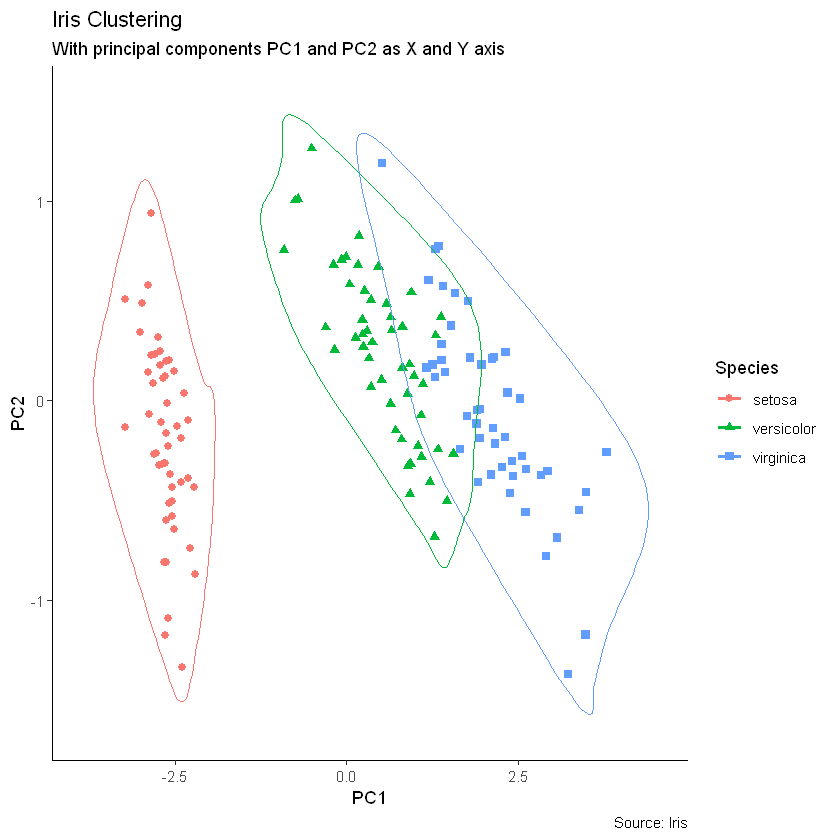

In [65]:
# devtools::install_github("hrbrmstr/ggalt")
library(ggplot2)
library(ggalt)
library(ggfortify)
theme_set(theme_classic())

# Compute data with principal components ------------------
df <- iris[c(1, 2, 3, 4)]
pca_mod <- prcomp(df)  # compute principal components

# Data frame of principal components ----------------------
df_pc <- data.frame(pca_mod$x, Species=iris$Species)  # dataframe of principal components
df_pc_vir <- df_pc[df_pc$Species == "virginica", ]  # df for 'virginica'
df_pc_set <- df_pc[df_pc$Species == "setosa", ]  # df for 'setosa'
df_pc_ver <- df_pc[df_pc$Species == "versicolor", ]  # df for 'versicolor'
 
# Plot ----------------------------------------------------
ggplot(df_pc, aes(PC1, PC2, col=Species)) + 
  geom_point(aes(shape=Species), size=2) +   # draw points
  labs(title="Iris Clustering", 
       subtitle="With principal components PC1 and PC2 as X and Y axis",
       caption="Source: Iris") + 
  coord_cartesian(xlim = 1.2 * c(min(df_pc$PC1), max(df_pc$PC1)), 
                  ylim = 1.2 * c(min(df_pc$PC2), max(df_pc$PC2))) +   # change axis limits
  geom_encircle(data = df_pc_vir, aes(x=PC1, y=PC2)) +   # draw circles
  geom_encircle(data = df_pc_set, aes(x=PC1, y=PC2)) + 
  geom_encircle(data = df_pc_ver, aes(x=PC1, y=PC2))